# La "forma" dei dati

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 99999

In [2]:
import quandl
quandl.ApiConfig.api_key = "PutYourCodeHere"

dataset_quandl = quandl.get('WIKI/AAPL', start_date="2018-01-01", end_date="2018-12-31")
dataset_quandl.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-14,180.32,180.52,177.8100,178.440,29075469.0,0.0,1.0,180.32,180.52,177.8100,178.440,29075469.0
2018-03-15,178.50,180.24,178.0701,178.650,22584565.0,0.0,1.0,178.50,180.24,178.0701,178.650,22584565.0
2018-03-16,178.65,179.12,177.6200,178.020,36836456.0,0.0,1.0,178.65,179.12,177.6200,178.020,36836456.0
2018-03-19,177.32,177.47,173.6600,175.300,32804695.0,0.0,1.0,177.32,177.47,173.6600,175.300,32804695.0
2018-03-20,175.24,176.80,174.9400,175.240,19314039.0,0.0,1.0,175.24,176.80,174.9400,175.240,19314039.0
2018-03-21,175.04,175.09,171.2600,171.270,35247358.0,0.0,1.0,175.04,175.09,171.2600,171.270,35247358.0
2018-03-22,170.00,172.68,168.6000,168.845,41051076.0,0.0,1.0,170.00,172.68,168.6000,168.845,41051076.0
2018-03-23,168.39,169.92,164.9400,164.940,40248954.0,0.0,1.0,168.39,169.92,164.9400,164.940,40248954.0
2018-03-26,168.07,173.10,166.4400,172.770,36272617.0,0.0,1.0,168.07,173.10,166.4400,172.770,36272617.0


In [3]:
dataset_quandl = dataset_quandl.iloc[:,:4]
dataset_quandl.columns = ["open","high","low","close"]
dataset_quandl.head(10)

,open,high,low,close
Date,,,,
2018-01-02,170.16,172.3000,169.26,172.26
2018-01-03,172.53,174.5500,171.96,172.23
2018-01-04,172.54,173.4700,172.08,173.03
2018-01-05,173.44,175.3700,173.05,175.00
2018-01-08,174.35,175.6100,173.93,174.35
2018-01-09,174.55,175.0600,173.41,174.33
2018-01-10,173.16,174.3000,173.00,174.29
2018-01-11,174.59,175.4886,174.49,175.28
2018-01-12,176.18,177.3600,175.65,177.09


## Libreria FFN per approvvigionamento dati

In [4]:
import ffn

dataset_ffn = ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2018-01-01', end='2018-12-31')
dataset_ffn.columns = ["open","high","low","close"]
dataset_ffn = dataset_ffn.apply(lambda x: round(x,2))
dataset_ffn.head(10)

,open,high,low,close
Date,,,,
2018-01-02,170.16,172.30,169.26,172.26
2018-01-03,172.53,174.55,171.96,172.23
2018-01-04,172.54,173.47,172.08,173.03
2018-01-05,173.44,175.37,173.05,175.00
2018-01-08,174.35,175.61,173.93,174.35
2018-01-09,174.55,175.06,173.41,174.33
2018-01-10,173.16,174.30,173.00,174.29
2018-01-11,174.59,175.49,174.49,175.28
2018-01-12,176.18,177.36,175.65,177.09


In [5]:
delta = dataset_quandl - dataset_ffn
delta.head(10)

,open,high,low,close
Date,,,,
2018-01-02,0.0,0.0000,0.0,0.0
2018-01-03,0.0,0.0000,0.0,0.0
2018-01-04,0.0,0.0000,0.0,0.0
2018-01-05,0.0,0.0000,0.0,0.0
2018-01-08,0.0,0.0000,0.0,0.0
2018-01-09,0.0,0.0000,0.0,0.0
2018-01-10,0.0,0.0000,0.0,0.0
2018-01-11,0.0,-0.0014,0.0,0.0
2018-01-12,0.0,0.0000,0.0,0.0


In [6]:
delta.open[delta.open != 0].dropna()

Date
2018-01-25   -0.005
2018-01-30   -0.005
2018-02-01   -0.005
2018-02-07   -0.005
2018-02-14    0.005
Name: open, dtype: float64

In [7]:
delta.high[delta.high != 0].dropna()

Date
2018-01-11   -0.0014
2018-01-31    0.0017
2018-02-28   -0.0050
2018-03-01   -0.0050
Name: high, dtype: float64

In [8]:
delta.low[delta.low != 0].dropna()

Date
2018-01-22    0.0016
2018-02-07   -0.0015
2018-03-15    0.0001
Name: low, dtype: float64

In [9]:
delta.close[delta.close != 0].dropna()

Date
2018-02-02   -0.130
2018-02-05    1.000
2018-02-08    0.170
2018-02-09   -0.440
2018-02-22    0.100
2018-02-23    0.055
2018-03-22   -0.005
Name: close, dtype: float64

In [10]:
delta[delta != 0].count()

open     5
high     4
low      3
close    7
dtype: int64

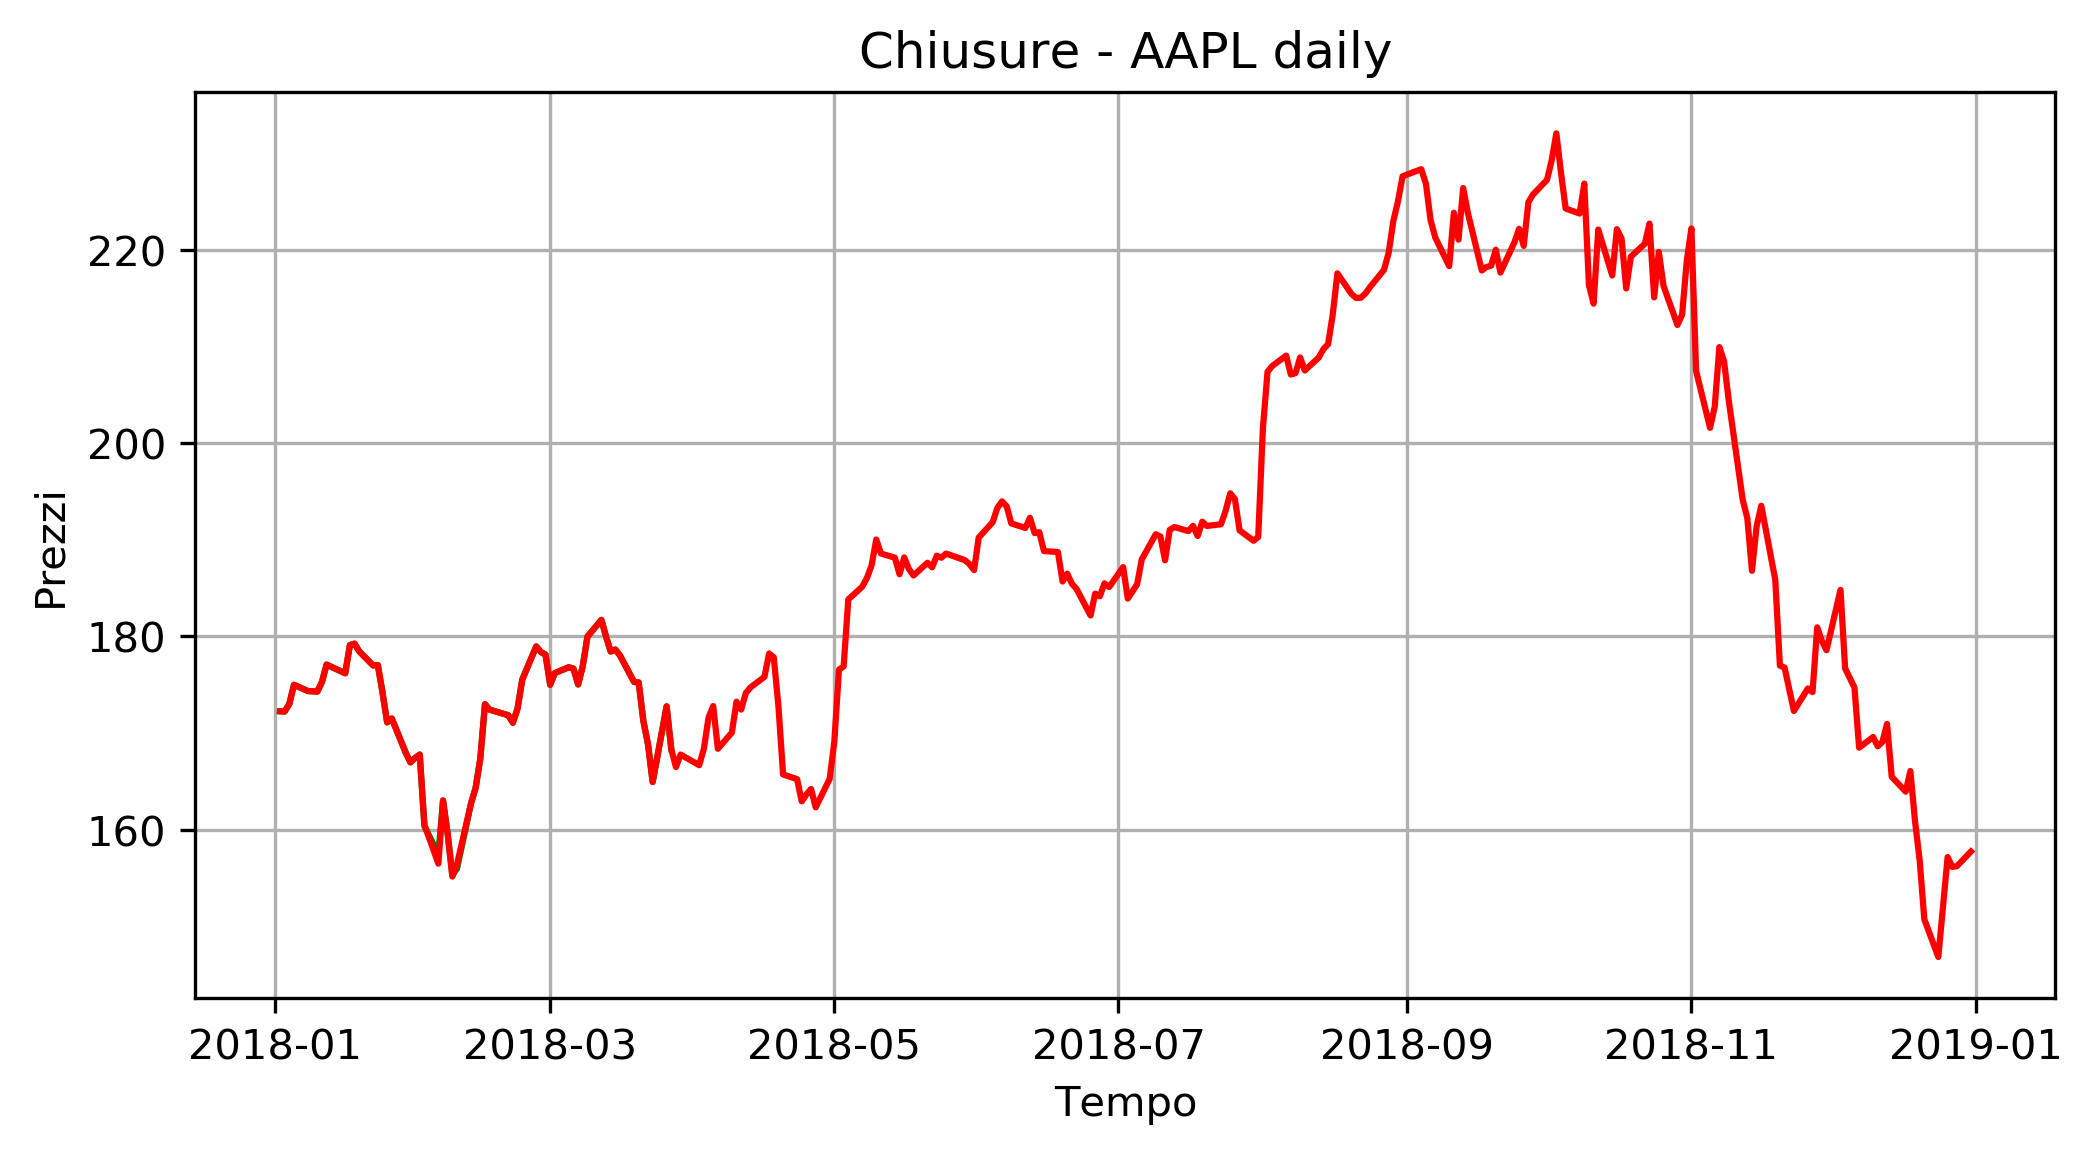

In [11]:
plt.figure(figsize=(8,4), dpi=300)
plt.plot(dataset_quandl.close, color='green')
plt.plot(dataset_ffn.close, color='red')
plt.xlabel("Tempo")
plt.ylabel("Prezzi")
plt.title("Chiusure - AAPL daily")
plt.grid(True)
plt.show()

# Cambio Fuso Orario (serie intraday)

In [12]:
def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ["date_time","open","high","low","close","up","down"]
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'],axis=1,inplace=True)
    return data

original_dataset = load_data("@GC_60min_Exchange.txt")
original_dataset[-30:-20]

,open,high,low,close,volume
date_time,,,,,
2019-09-12 11:00:00,1524.1,1525.8,1512.3,1518.3,82682
2019-09-12 12:00:00,1518.3,1522.4,1508.6,1510.9,46944
2019-09-12 13:00:00,1510.9,1512.8,1504.6,1506.3,28050
2019-09-12 14:00:00,1506.3,1508.7,1504.6,1506.2,22334
2019-09-12 15:00:00,1506.2,1508.1,1505.4,1505.9,7932
2019-09-12 16:00:00,1506.0,1507.5,1505.5,1506.8,4336
2019-09-12 17:00:00,1506.8,1507.1,1505.5,1506.8,2521
2019-09-12 19:00:00,1506.5,1507.2,1502.9,1504.6,3620
2019-09-12 20:00:00,1504.5,1506.0,1503.4,1505.4,2976


In [13]:
dataset = original_dataset.copy()
dataset.index = dataset.index.tz_localize(tz = "America/New_York")
dataset.index = dataset.index.tz_convert(tz = "Europe/Rome")
dataset[-30:-20]

,open,high,low,close,volume
date_time,,,,,
2019-09-12 17:00:00+02:00,1524.1,1525.8,1512.3,1518.3,82682
2019-09-12 18:00:00+02:00,1518.3,1522.4,1508.6,1510.9,46944
2019-09-12 19:00:00+02:00,1510.9,1512.8,1504.6,1506.3,28050
2019-09-12 20:00:00+02:00,1506.3,1508.7,1504.6,1506.2,22334
2019-09-12 21:00:00+02:00,1506.2,1508.1,1505.4,1505.9,7932
2019-09-12 22:00:00+02:00,1506.0,1507.5,1505.5,1506.8,4336
2019-09-12 23:00:00+02:00,1506.8,1507.1,1505.5,1506.8,2521
2019-09-13 01:00:00+02:00,1506.5,1507.2,1502.9,1504.6,3620
2019-09-13 02:00:00+02:00,1504.5,1506.0,1503.4,1505.4,2976


# Prime statistiche

In [14]:
import ffn

dataset = ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2007-01-01', end='2019-09-22')
dataset.columns = ["open","high","low","close"]
dataset = dataset.apply(lambda x: round(x,2))
dataset["avgprice"] = dataset.mean(axis=1)
dataset["medprice"] = dataset.open + (dataset.high - dataset.low) / 2
dataset["medbodyprice"] = dataset.open + abs(dataset.open - dataset.close) / 2
dataset["body"] = dataset.close - dataset.open
dataset["range"] = dataset.high - dataset.low
dataset.head(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range
Date,,,,,,,,,
2007-01-03,12.33,12.37,11.70,11.97,12.0925,12.665,12.510,-0.36,0.67
2007-01-04,12.01,12.28,11.97,12.24,12.1250,12.165,12.125,0.23,0.31
2007-01-05,12.25,12.31,12.06,12.15,12.1925,12.375,12.300,-0.10,0.25
2007-01-08,12.28,12.36,12.18,12.21,12.2575,12.370,12.315,-0.07,0.18
2007-01-09,12.35,13.28,12.16,13.22,12.7525,12.910,12.785,0.87,1.12
2007-01-10,13.54,13.97,13.35,13.86,13.6800,13.850,13.700,0.32,0.62
2007-01-11,13.71,13.83,13.59,13.69,13.7050,13.830,13.720,-0.02,0.24
2007-01-12,13.51,13.58,13.32,13.52,13.4825,13.640,13.515,0.01,0.26
2007-01-16,13.67,13.89,13.64,13.87,13.7675,13.795,13.770,0.20,0.25


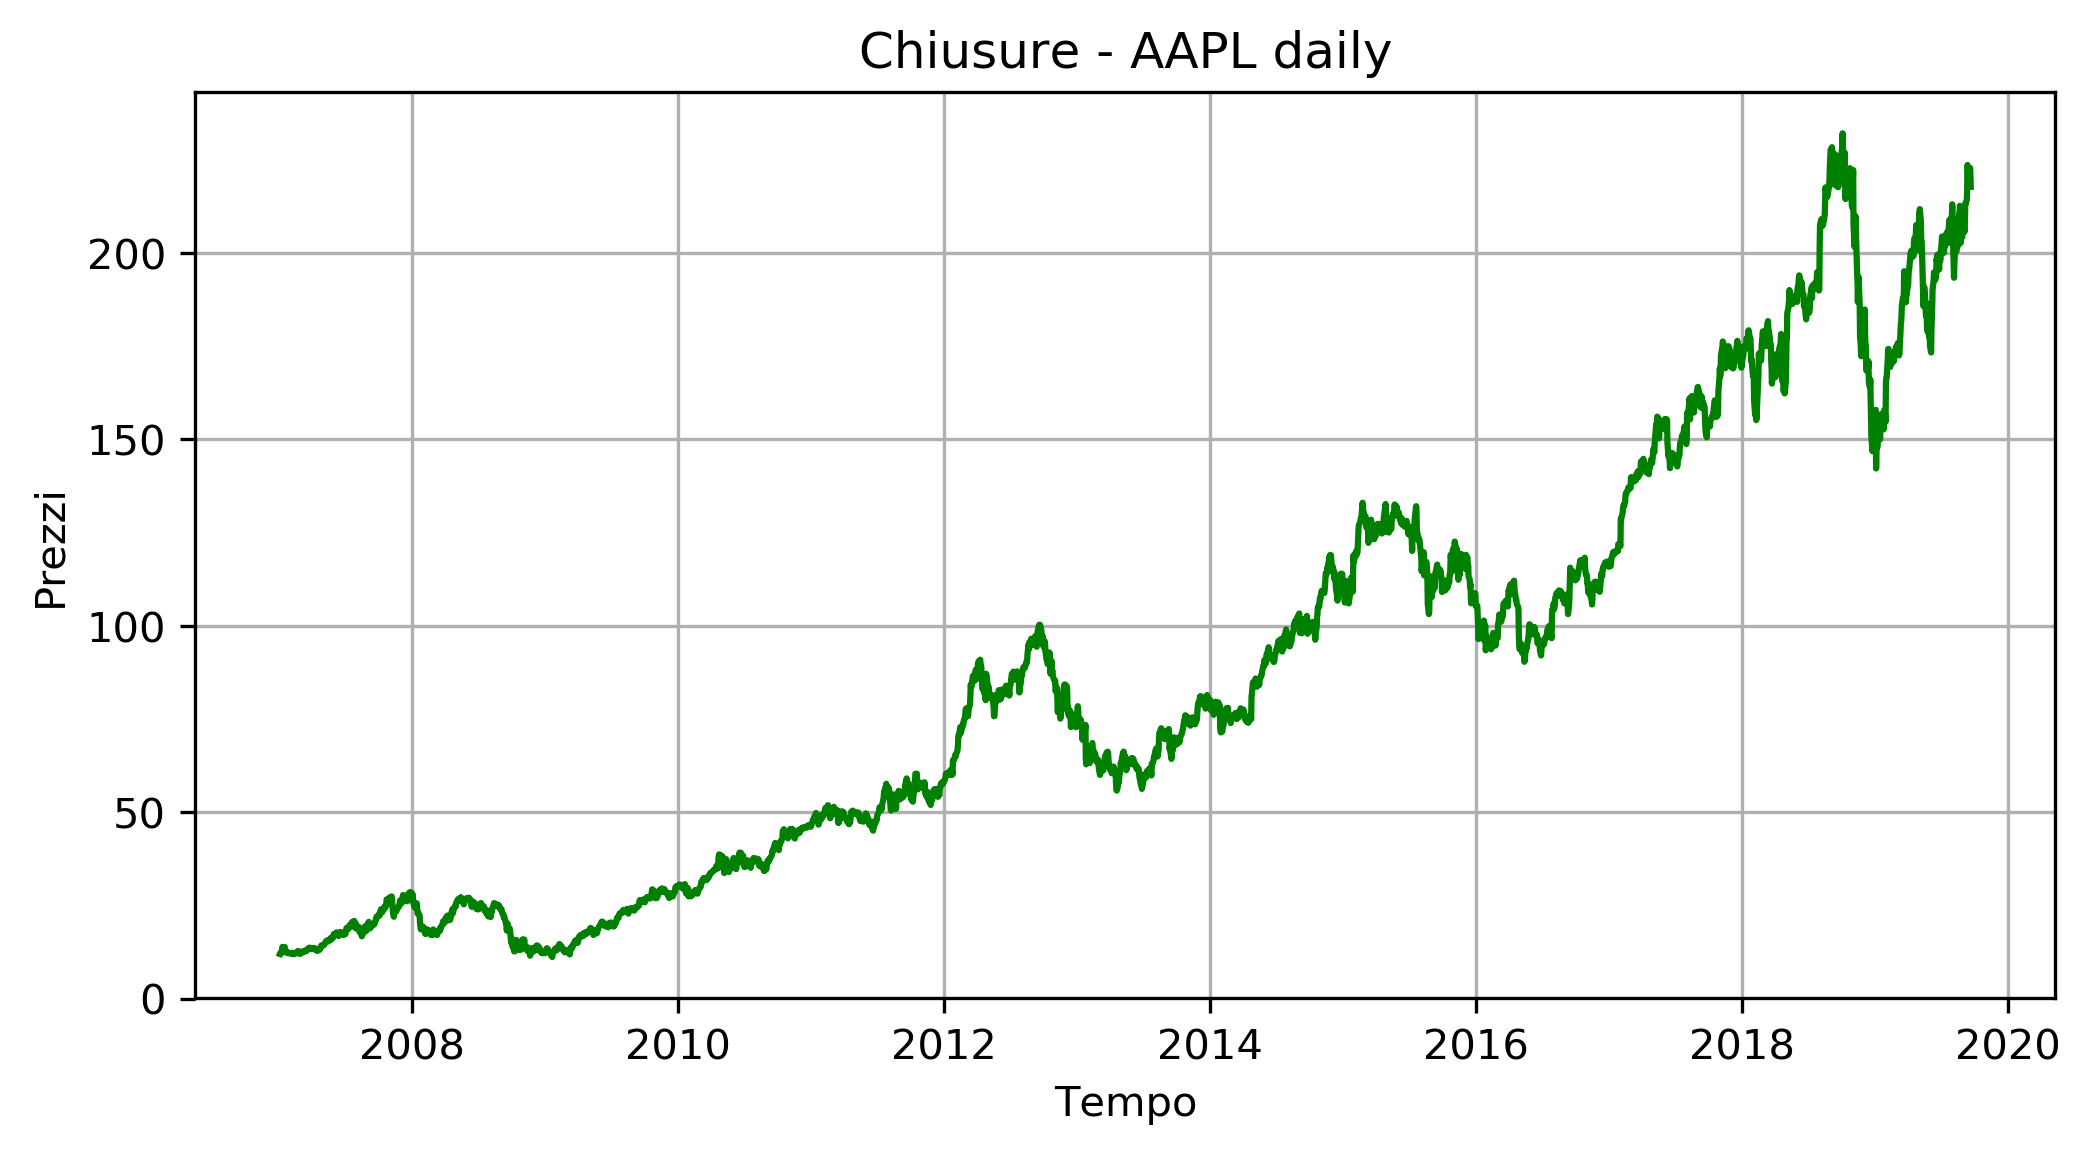

In [15]:
plt.figure(figsize=(8,4), dpi=300)
plt.plot(dataset.close, color='green')
plt.xlabel("Tempo")
plt.ylabel("Prezzi")
plt.title("Chiusure - AAPL daily")
plt.grid(True)
plt.show()

In [16]:
dataset.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,open,high,low,close,avgprice,medprice,medbodyprice,body,range
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000
mean,85.836524,86.632339,85.005709,85.838879,85.828363,86.649839,86.246602,0.002355,1.626630
std,57.909565,58.394720,57.465001,57.937824,57.923603,58.377679,58.133107,1.269147,1.409971
min,11.340000,11.710000,11.170000,11.170000,11.437500,11.595000,11.585000,-9.100000,0.090000
1%,12.280000,12.490100,12.120200,12.250100,12.300025,12.480200,12.415100,-3.799800,0.190000
5%,13.790000,14.181500,13.451000,13.841000,13.748500,14.051250,13.935500,-1.859500,0.330000
10%,18.401000,18.710000,17.970000,18.284000,18.380250,18.760500,18.630500,-1.240000,0.430000
25%,31.447500,32.140000,31.142500,31.777500,31.644375,31.751250,31.595000,-0.490000,0.710000
50%,76.945000,77.740000,76.270000,76.775000,77.003750,77.757500,77.377500,0.020000,1.240000
75%,120.000000,120.487500,119.242500,119.962500,119.840000,120.517500,120.055000,0.520000,2.050000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


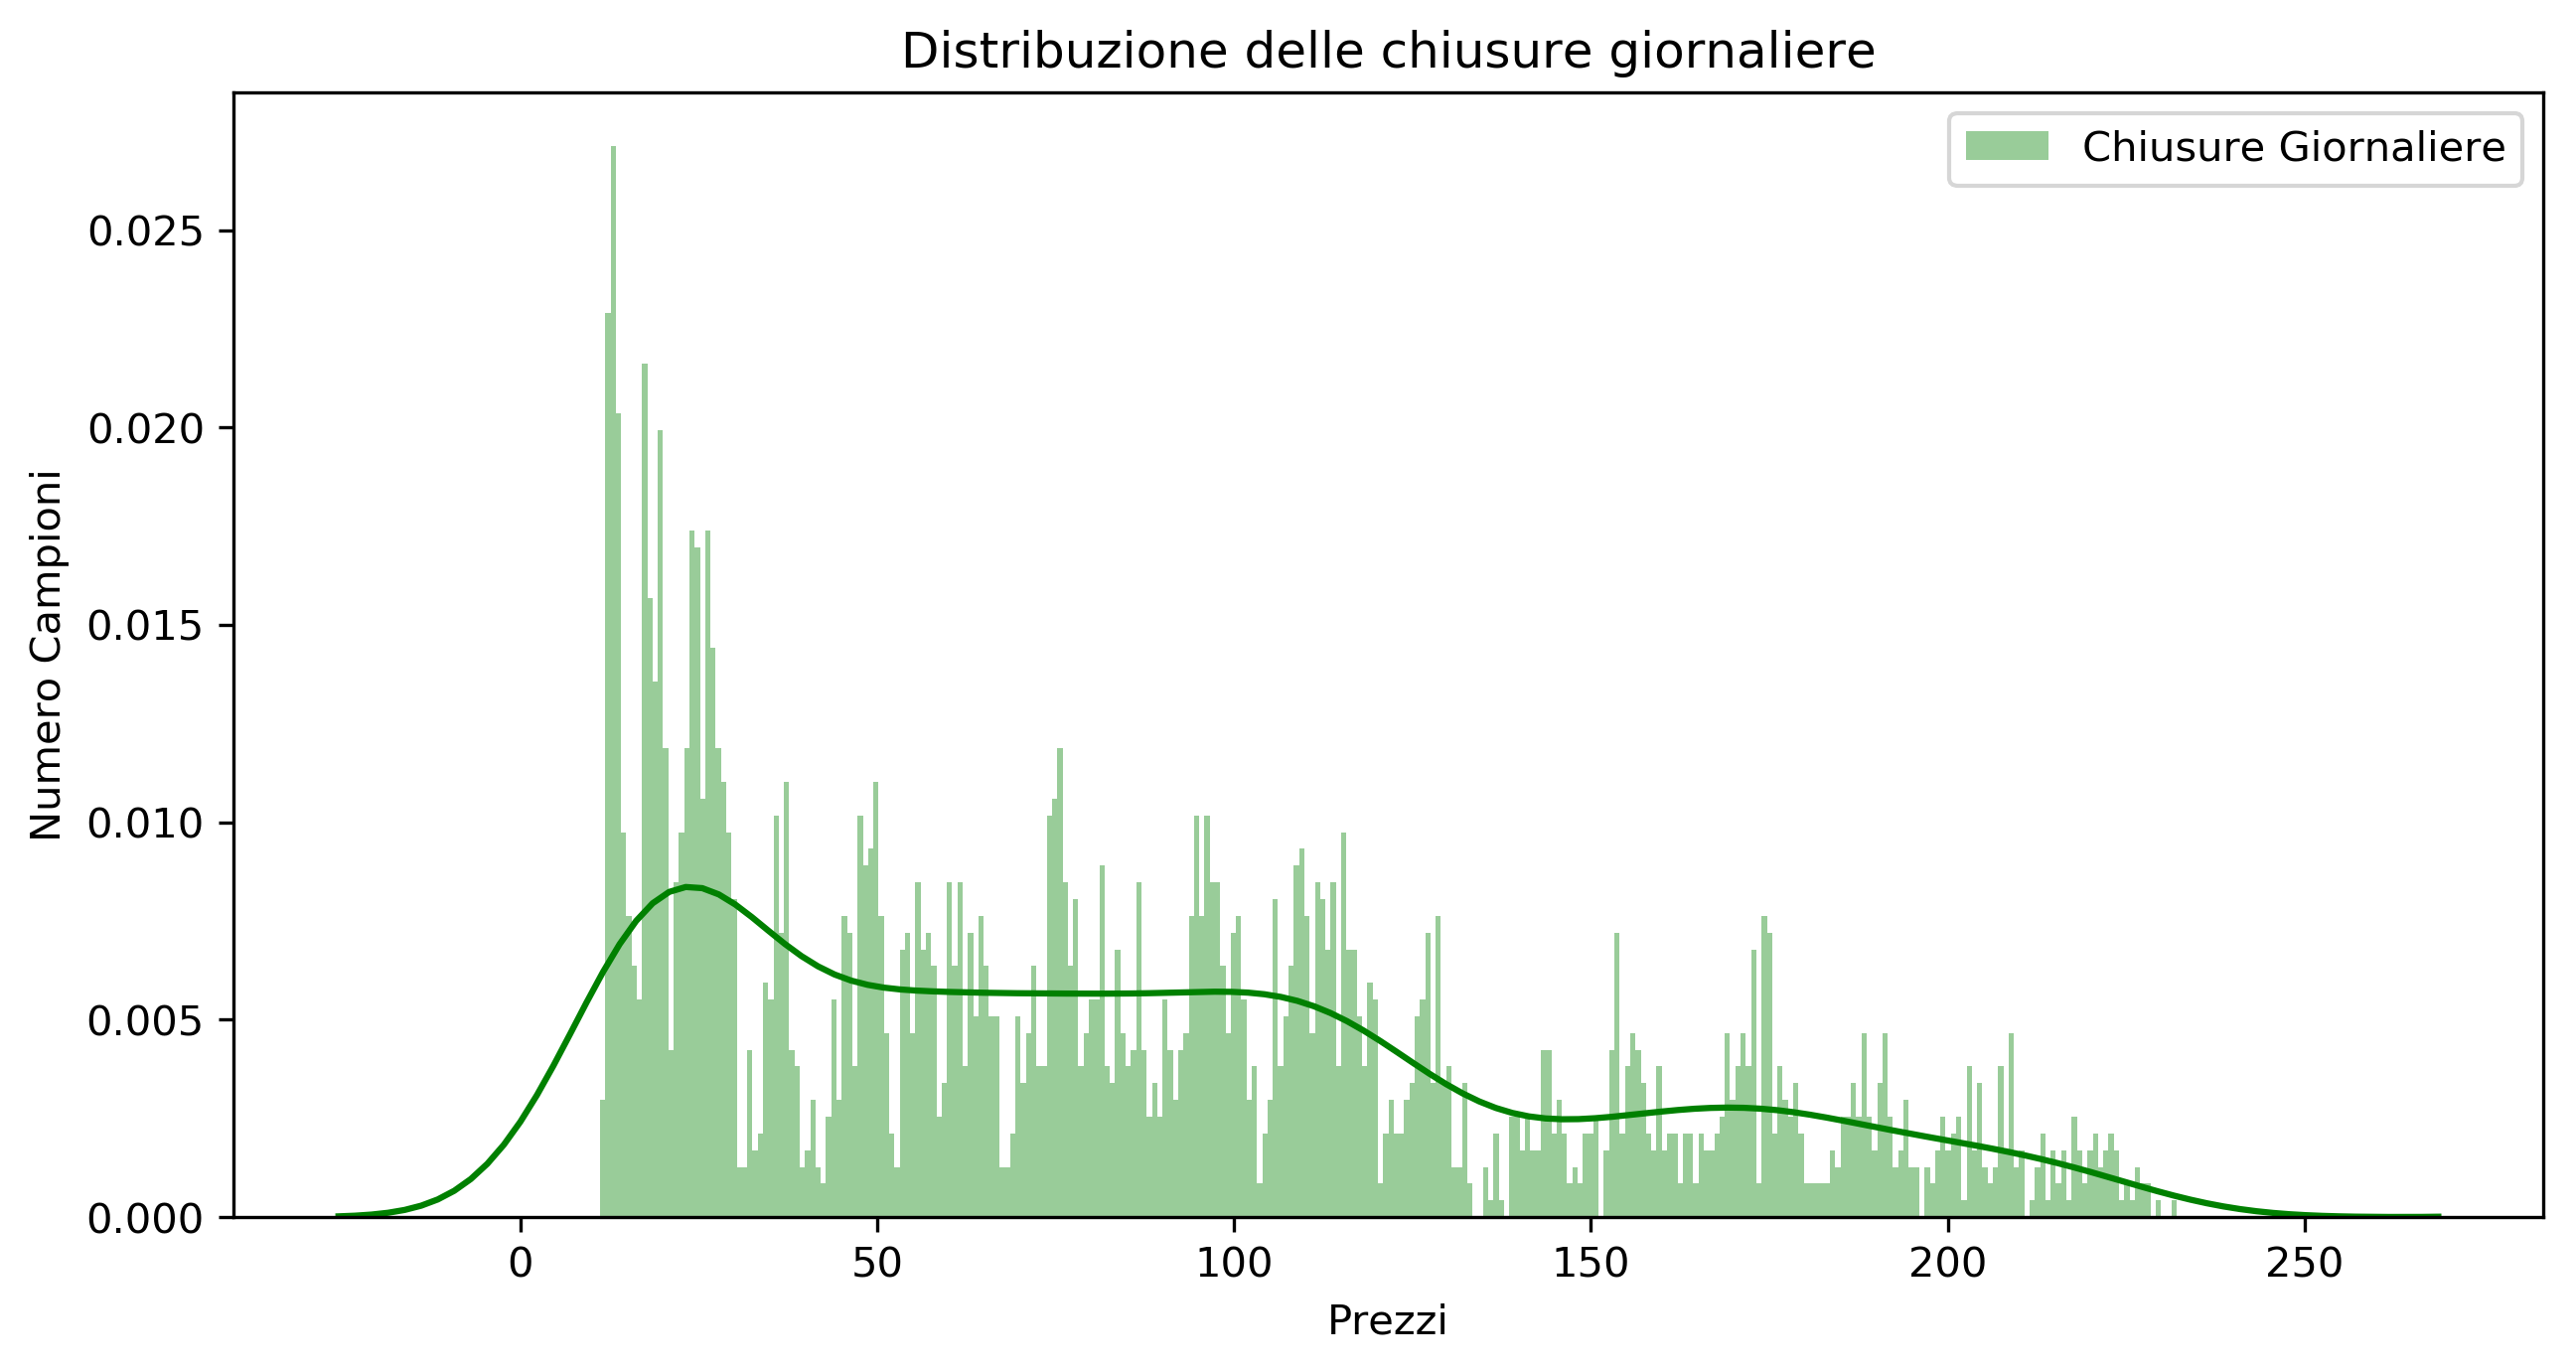

In [17]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset.close, bins=300, color="green", label='Chiusure Giornaliere')
plt.title("Distribuzione delle chiusure giornaliere")
plt.xlabel("Prezzi")
plt.ylabel("Numero Campioni")
plt.legend()
plt.show();

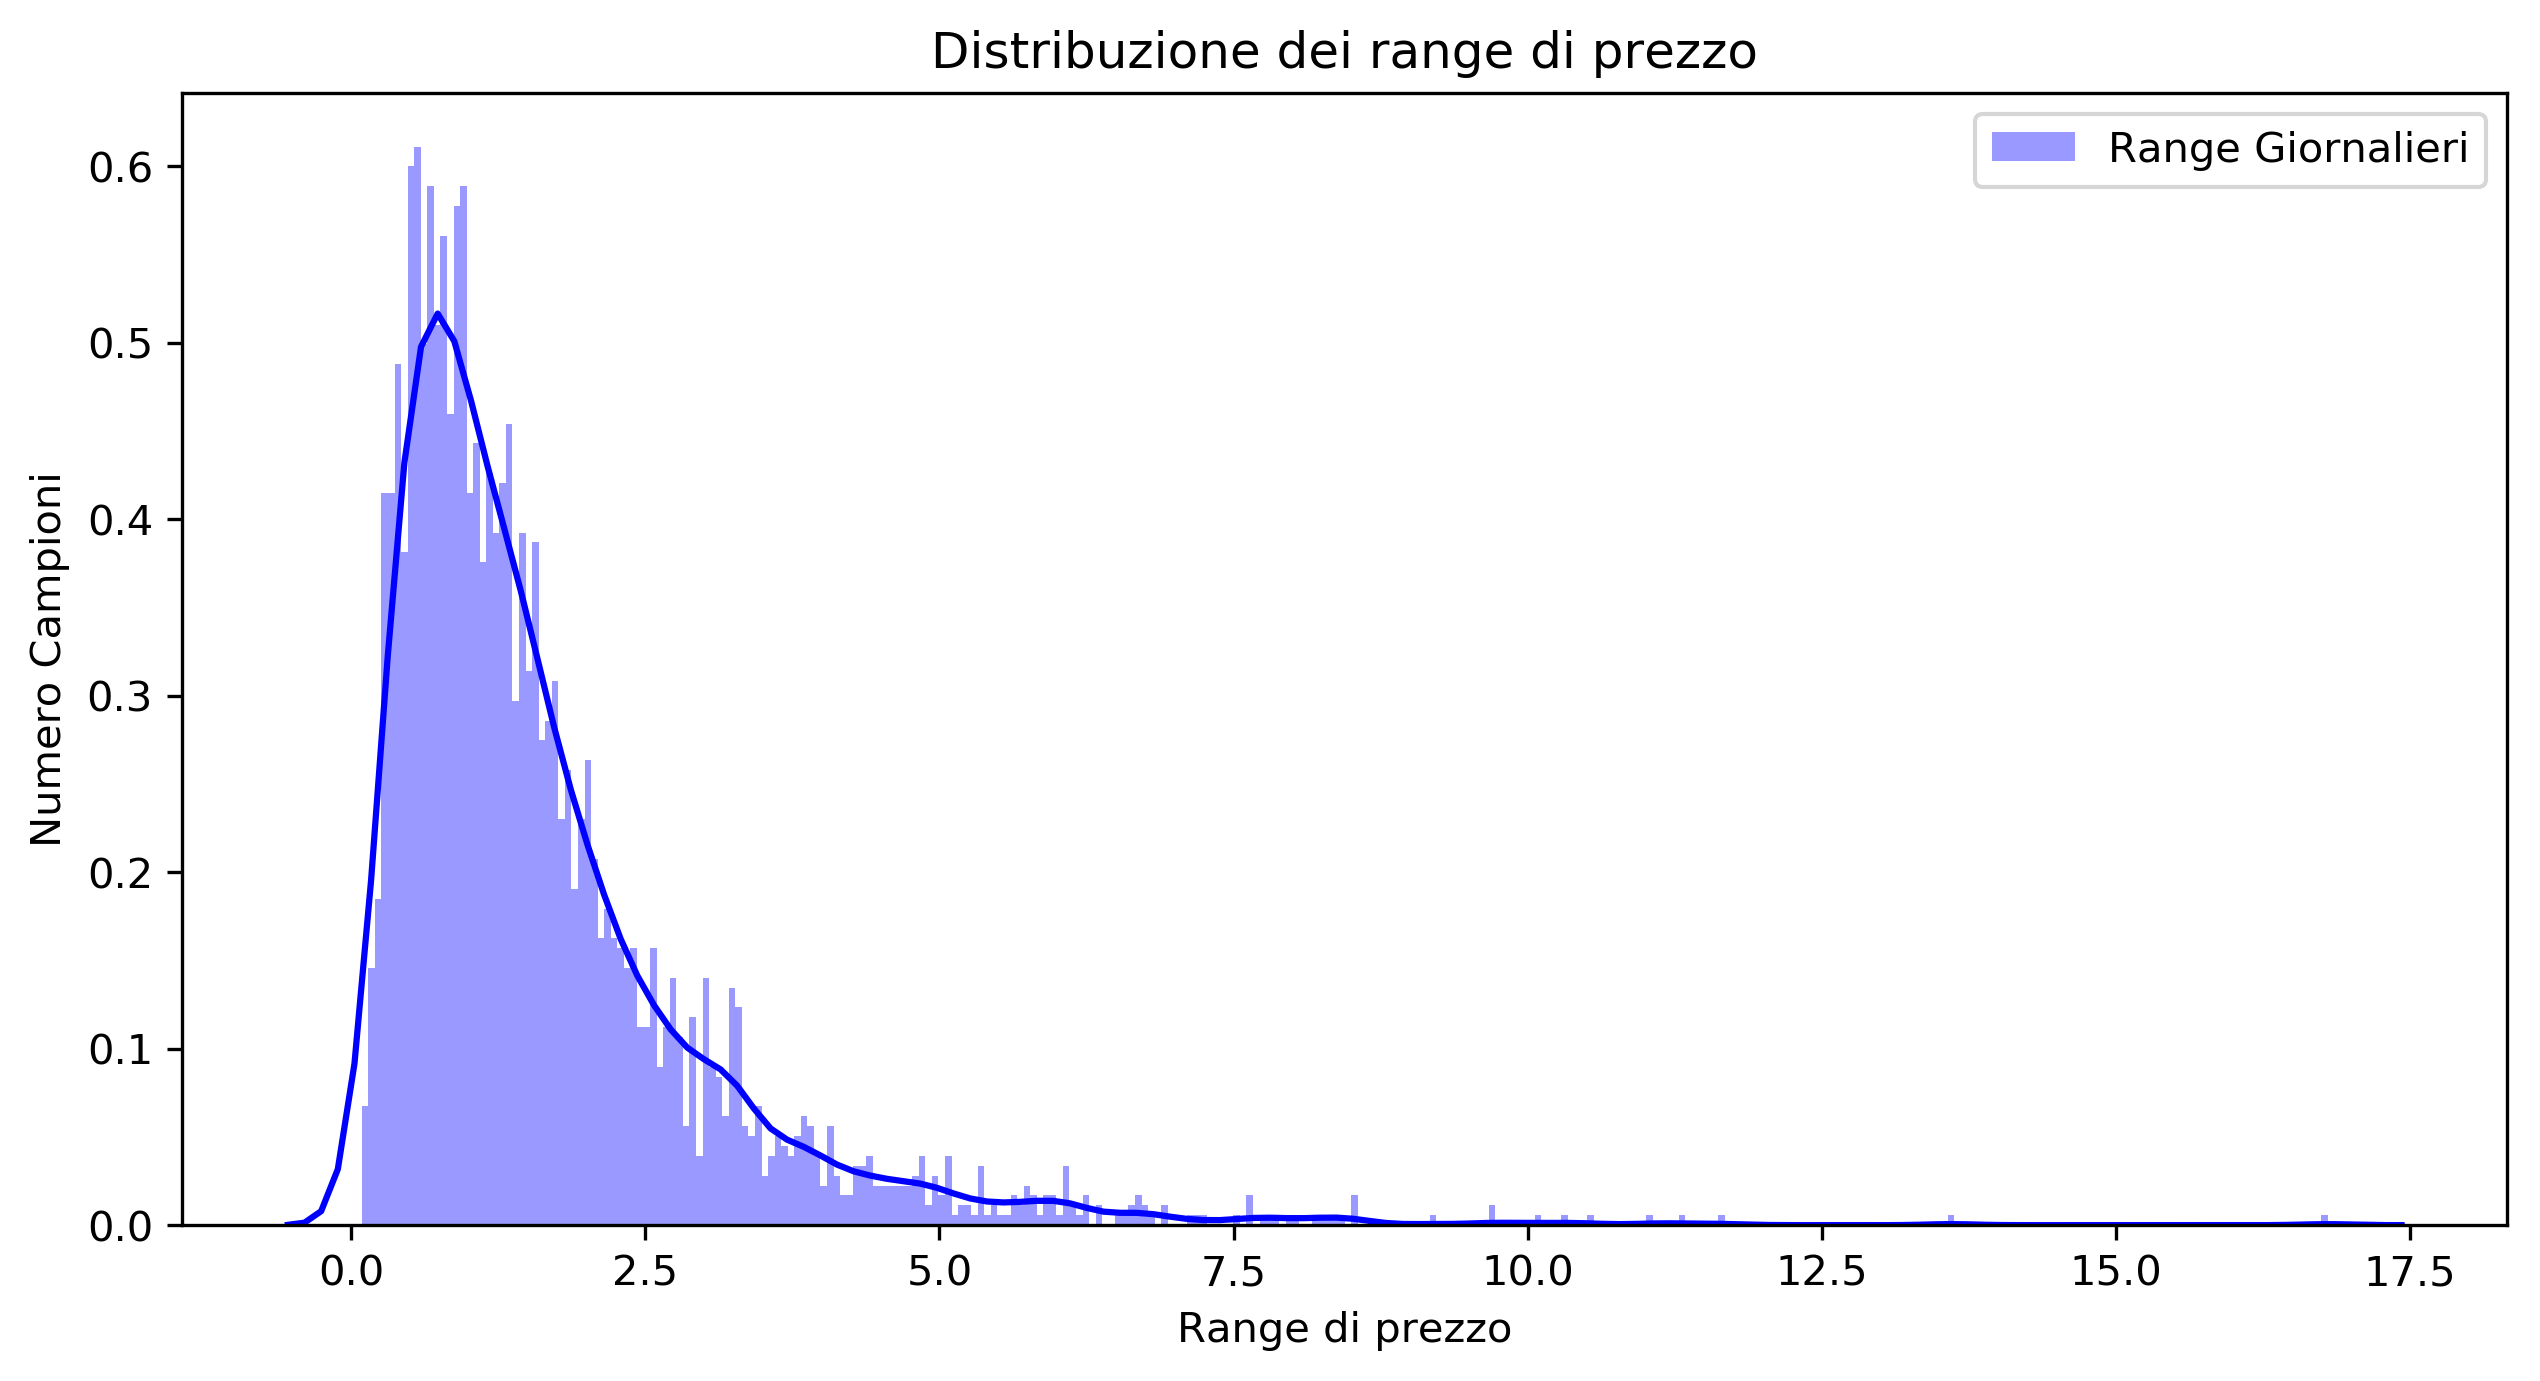

In [18]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset.range, bins=300, color="blue", label='Range Giornalieri')
plt.title("Distribuzione dei range di prezzo")
plt.xlabel("Range di prezzo")
plt.ylabel("Numero Campioni")
plt.legend()
plt.show()

In [19]:
dataset.range.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    3202.000000
mean        1.626630
std         1.409971
min         0.090000
1%          0.190000
5%          0.330000
10%         0.430000
25%         0.710000
50%         1.240000
75%         2.050000
90%         3.250000
95%         4.320000
99%         6.909000
max        16.800000
Name: range, dtype: float64

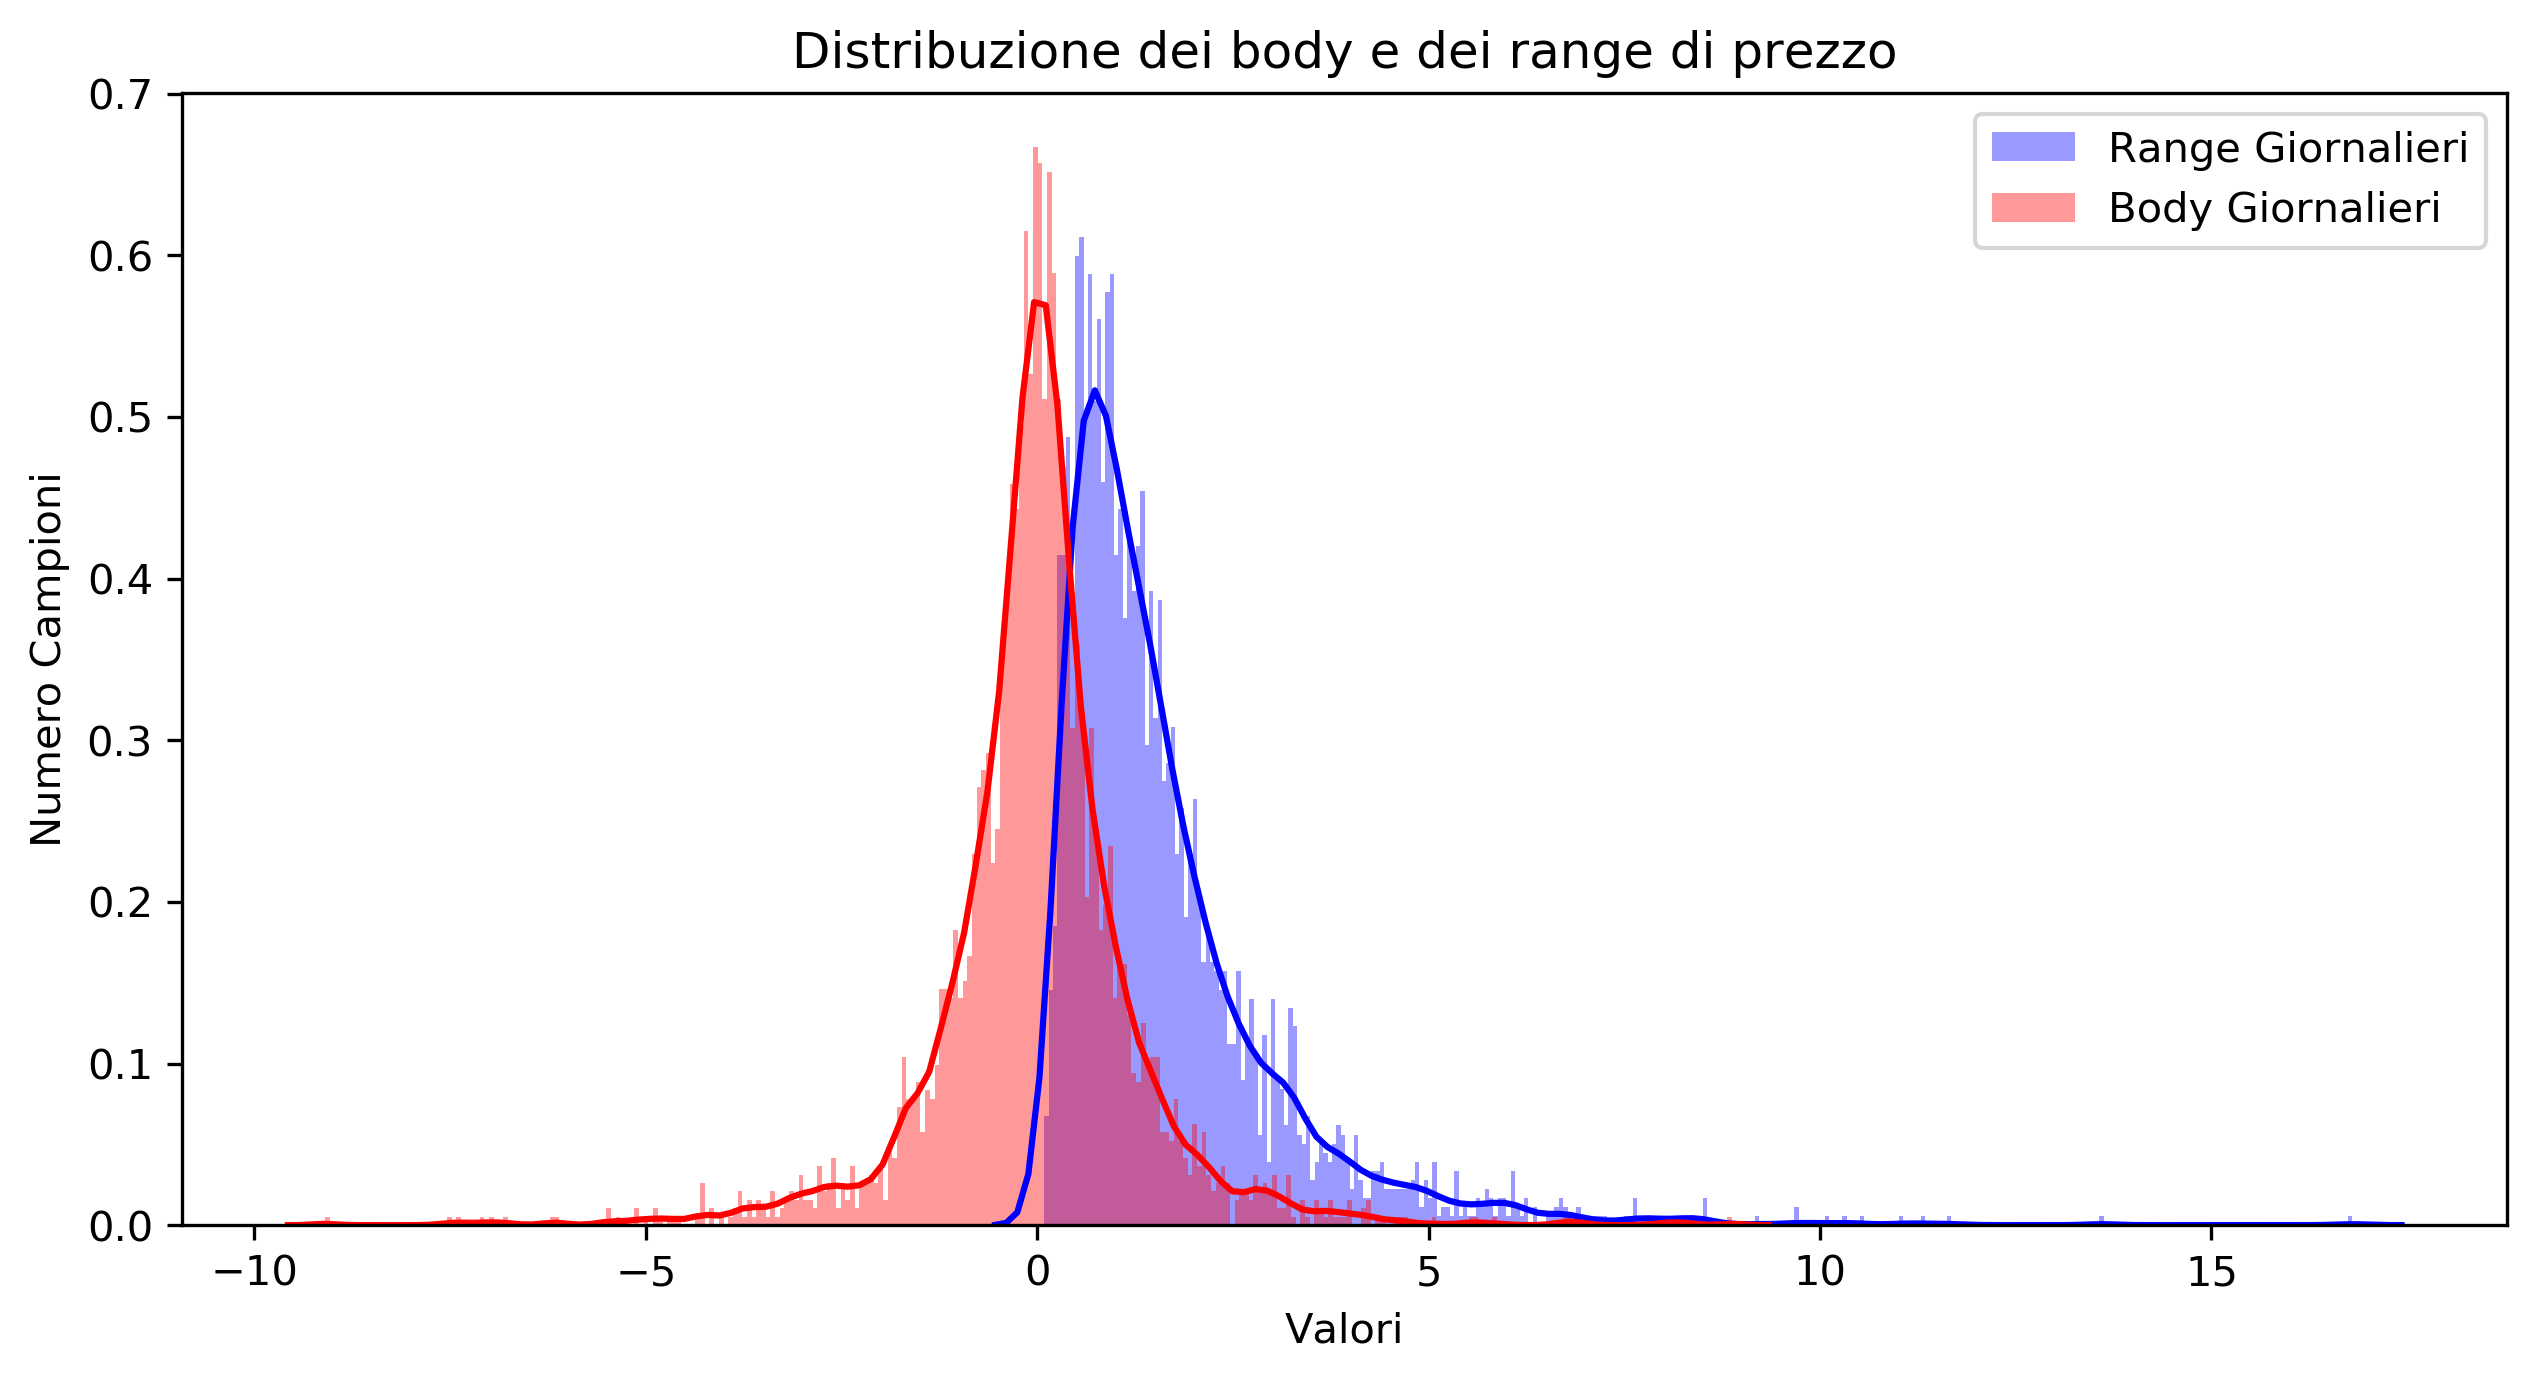

In [20]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset.range, bins=300, color="blue", label='Range Giornalieri')
sns.distplot(dataset.body, bins=300, color="red", label='Body Giornalieri')
plt.title("Distribuzione dei body e dei range di prezzo")
plt.xlabel("Valori")
plt.ylabel("Numero Campioni")
plt.legend()
plt.show()

## Estendiamo la nostra analisi alle variazioni percentuali dei prezzi

In [21]:
dataset_perc = dataset.copy().pct_change().dropna() * 100
dataset_perc.tail(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range
Date,,,,,,,,,
2019-09-09,0.369073,0.942076,-0.677615,0.426709,0.266904,1.172066,0.340414,-15.189873,181.151832
2019-09-10,-0.456153,0.157087,0.303217,1.181305,0.295381,-0.519481,0.048797,-523.880597,-5.586592
2019-09-11,1.968578,3.196789,2.843512,3.179511,2.799604,2.155780,2.578038,94.366197,17.948718
2019-09-12,3.086165,1.211390,2.356129,-0.223624,1.593251,2.497060,2.184939,-130.978261,-40.468227
2019-09-13,-2.135231,-2.486529,-2.620479,-1.945403,-2.297223,-2.072116,-2.229066,-26.900585,5.898876
2019-09-16,-1.031818,-0.298927,0.248825,0.525714,-0.141462,-1.293463,-0.820397,-273.600000,-31.830239
2019-09-17,1.024204,0.313451,0.717044,0.363802,0.603208,0.819579,0.692366,-65.898618,-33.852140
2019-09-18,0.500091,0.919301,0.146039,0.937925,0.626845,0.885377,0.719375,131.081081,100.588235
2019-09-19,0.429748,0.408346,0.423806,-0.812497,0.110595,0.421969,0.279386,-161.403509,-0.586510


In [22]:
dataset_perc.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,open,high,low,close,avgprice,medprice,medbodyprice,body,range
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000
mean,0.112769,0.104077,0.111615,0.110319,0.104264,0.112043,0.113841,NaN,14.283445
std,2.125835,1.660630,2.007511,1.979722,1.651162,2.106818,2.173465,NaN,68.184778
min,-14.494774,-12.472648,-19.898677,-17.903930,-11.996679,-14.529354,-17.189047,-inf,-84.454410
1%,-5.712841,-4.334191,-5.440269,-5.586870,-4.601354,-5.965622,-6.770969,-4000.000000,-65.432099
5%,-3.106644,-2.348557,-2.883259,-2.851299,-2.437615,-3.305334,-3.481411,-766.666667,-53.472222
10%,-2.125464,-1.649405,-2.023429,-2.070839,-1.643579,-2.263267,-2.406095,-410.869565,-46.226415
25%,-0.881092,-0.709779,-0.739968,-0.792620,-0.666290,-0.847458,-0.794800,-200.000000,-28.846154
50%,0.160449,0.082169,0.208523,0.095217,0.155252,0.271893,0.349127,-103.617571,-3.030303
75%,1.139447,0.878110,1.030111,1.107570,0.904646,1.198869,1.231334,0.000000,39.000000


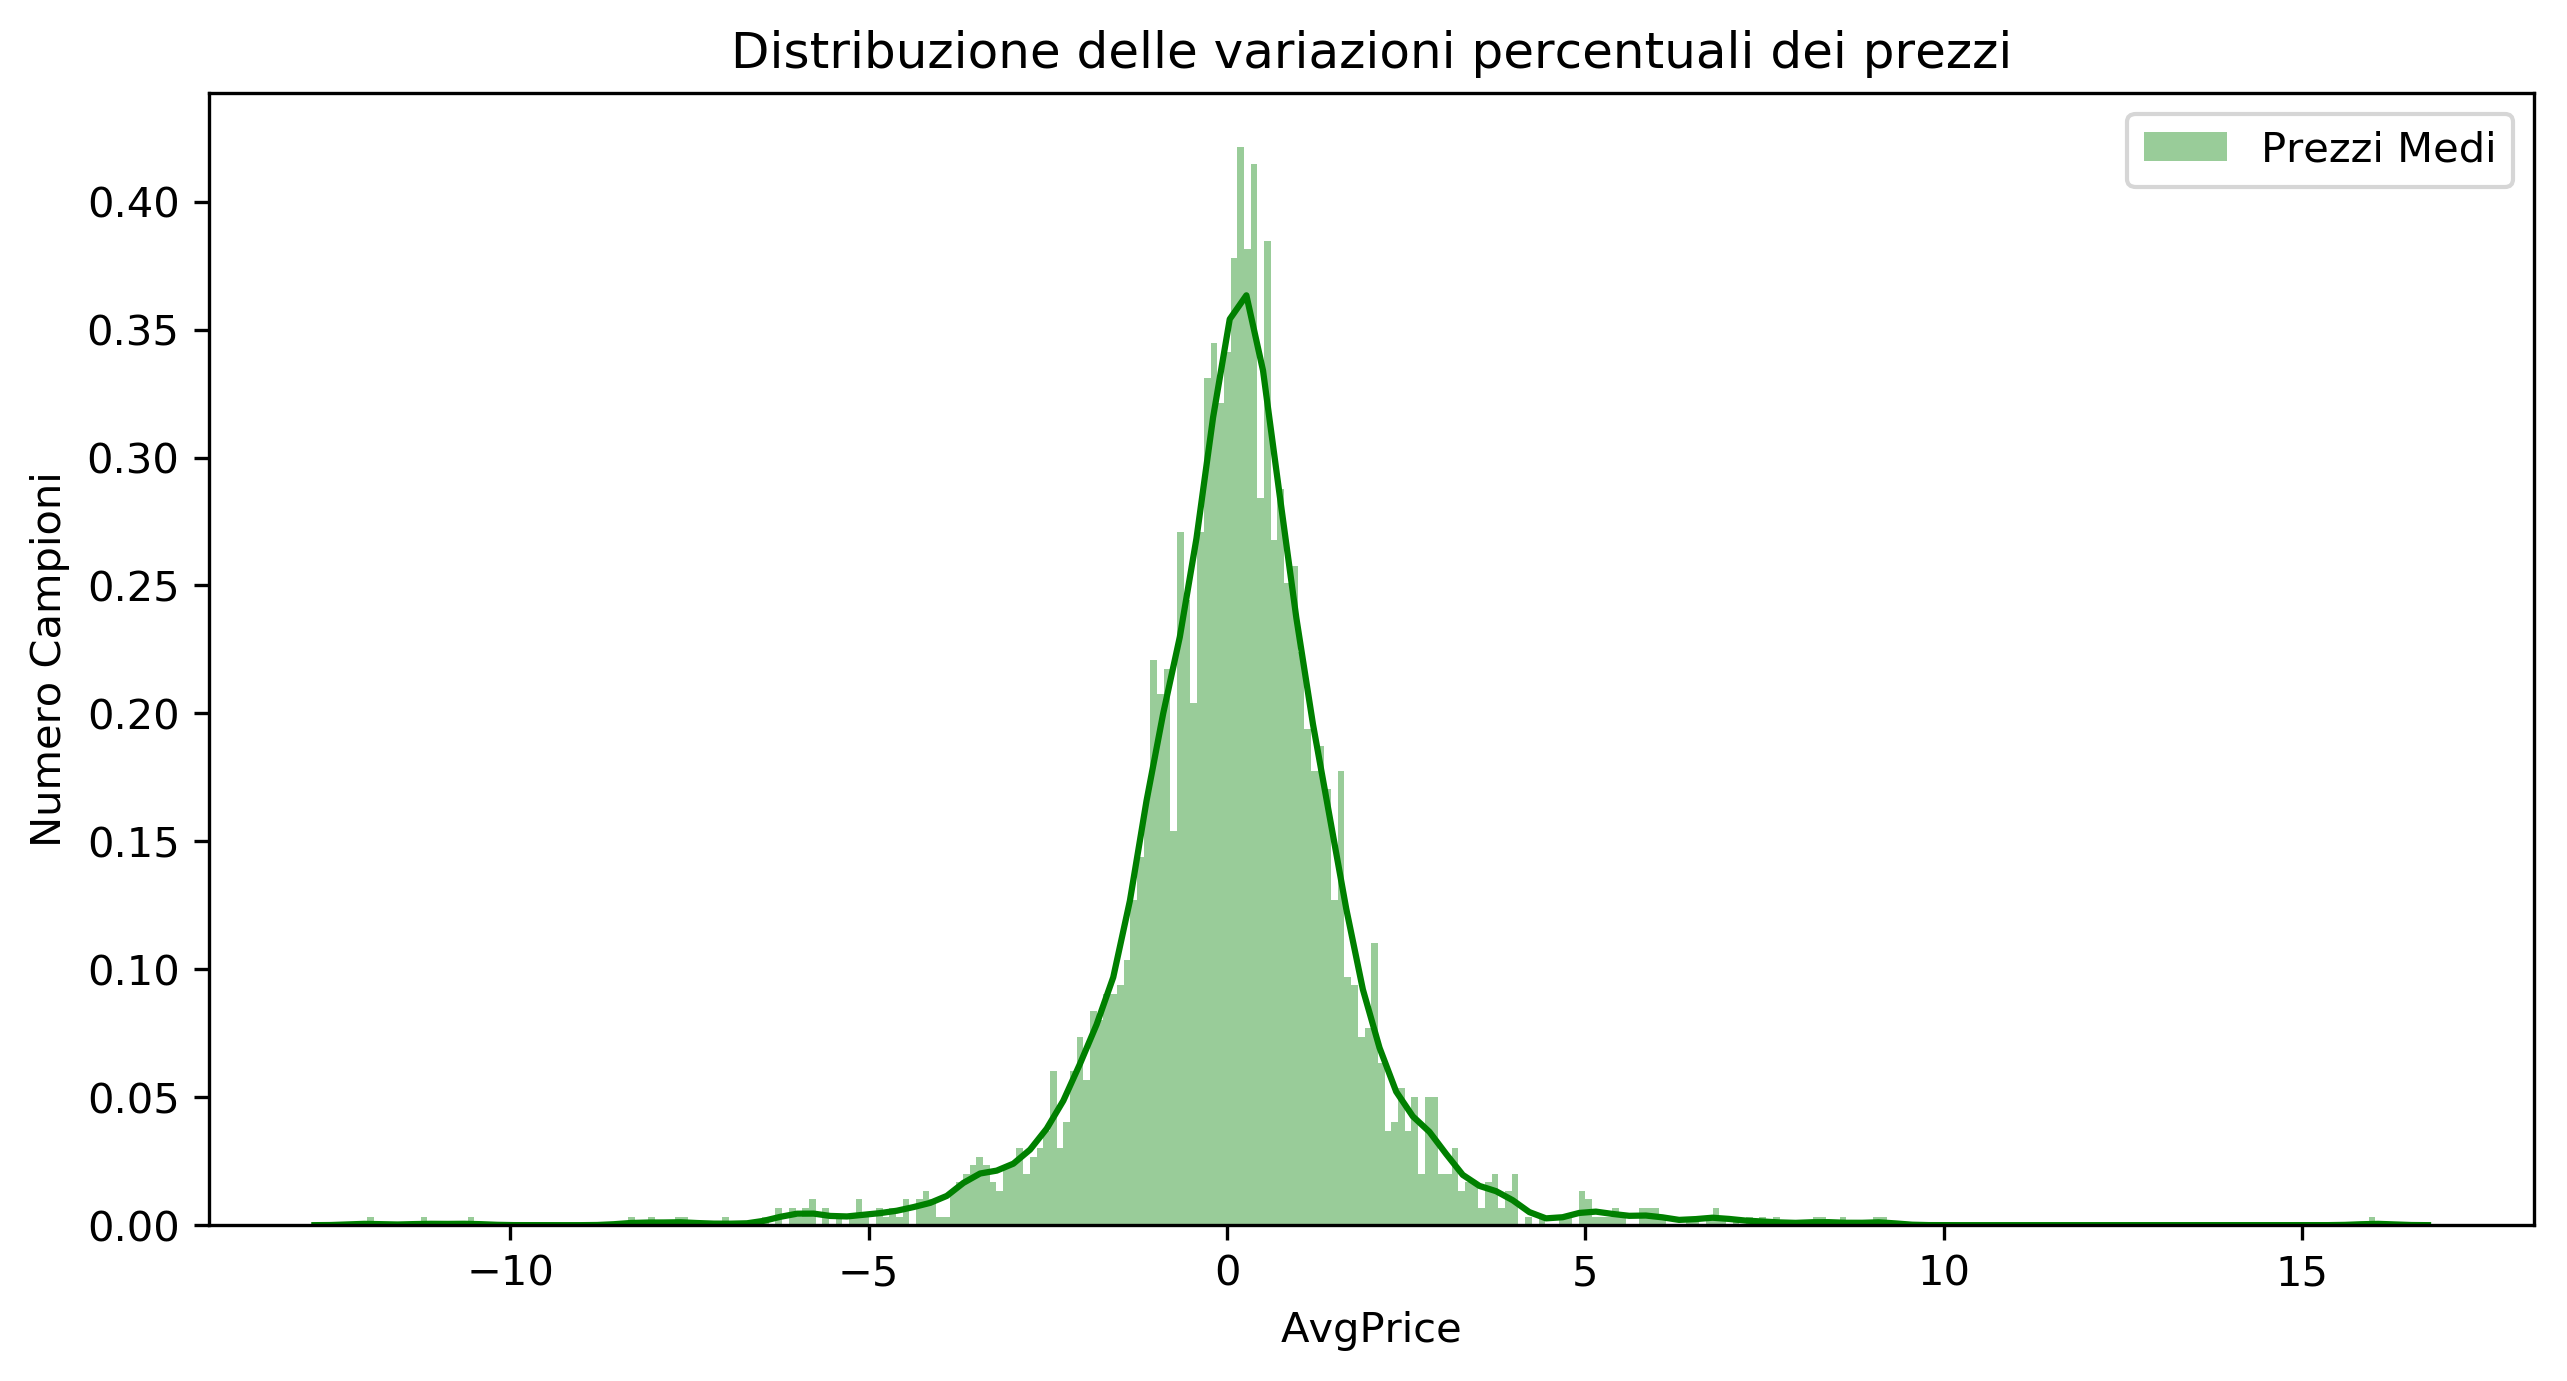

In [23]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset_perc.avgprice, bins=300, color="green", label='Prezzi Medi')
plt.title("Distribuzione delle variazioni percentuali dei prezzi")
plt.xlabel("AvgPrice")
plt.ylabel("Numero Campioni")
plt.legend()
plt.show()

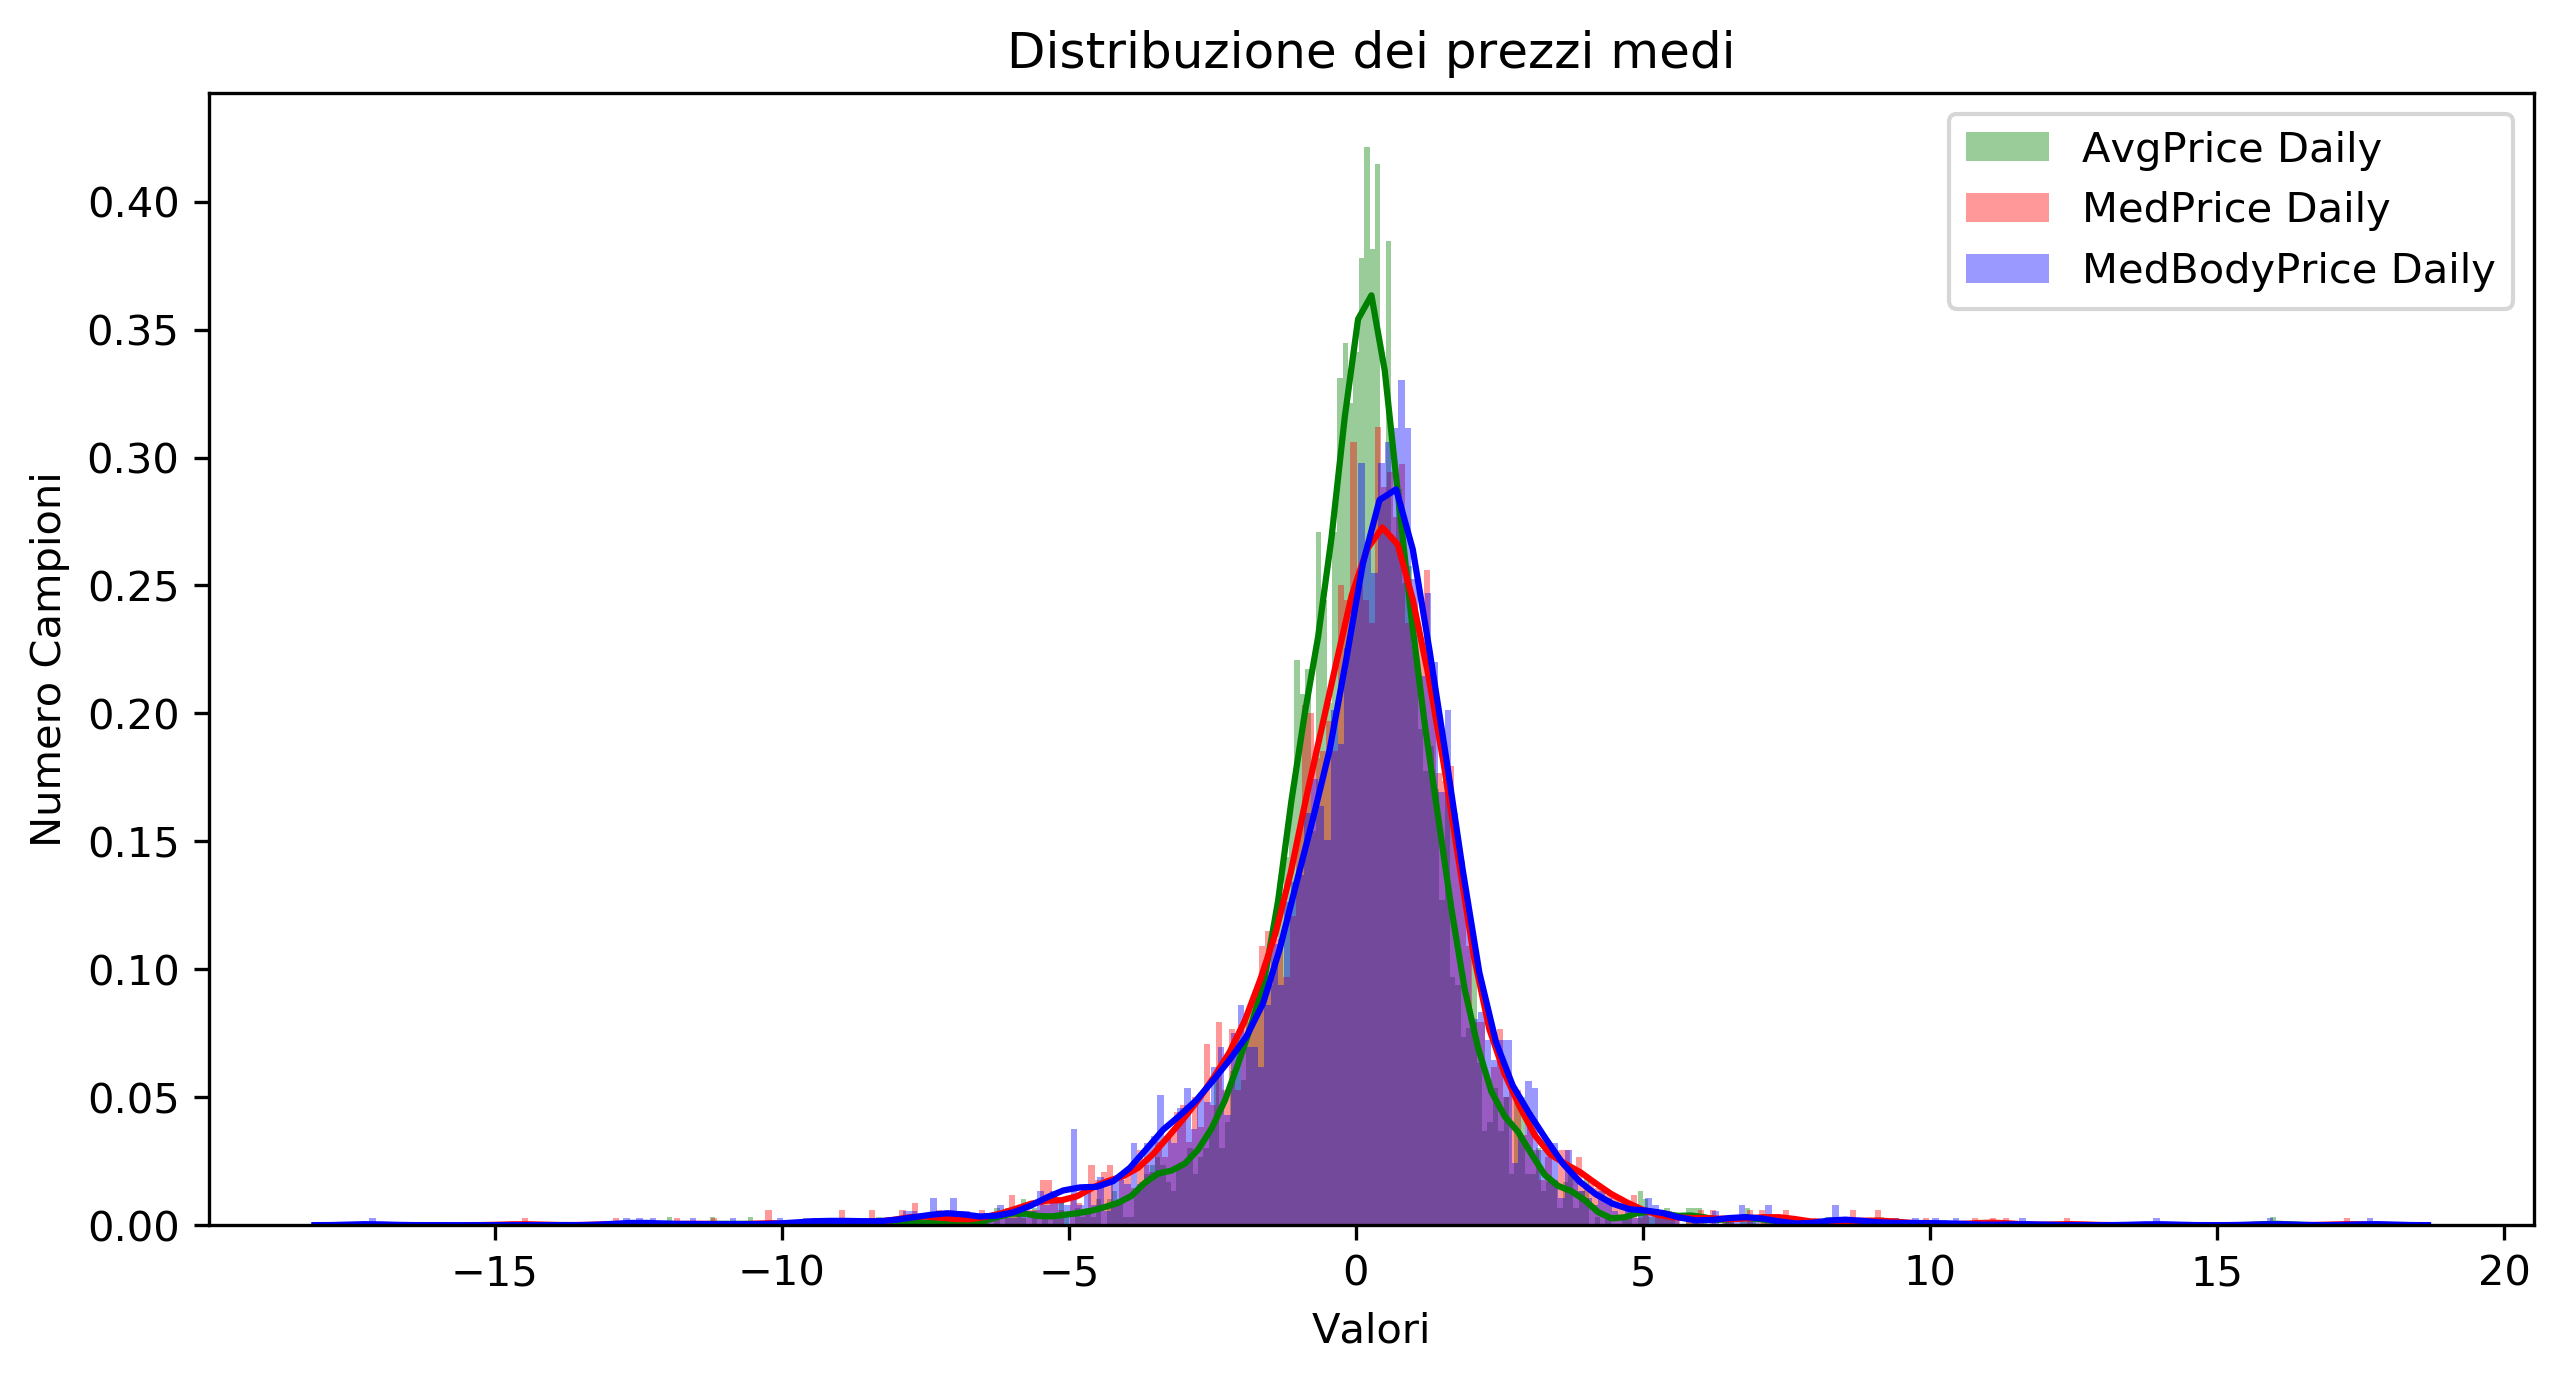

In [24]:
plt.figure(figsize=(10,5),dpi=300)
sns.distplot(dataset_perc.avgprice, bins=300, color="green", label = "AvgPrice Daily")
sns.distplot(dataset_perc.medprice, bins=300, color="red", label = "MedPrice Daily")
sns.distplot(dataset_perc.medbodyprice, bins=300, color="blue", label = "MedBodyPrice Daily")
plt.title("Distribuzione dei prezzi medi")
plt.xlabel("Valori")
plt.ylabel("Numero Campioni")
plt.legend()
plt.show()

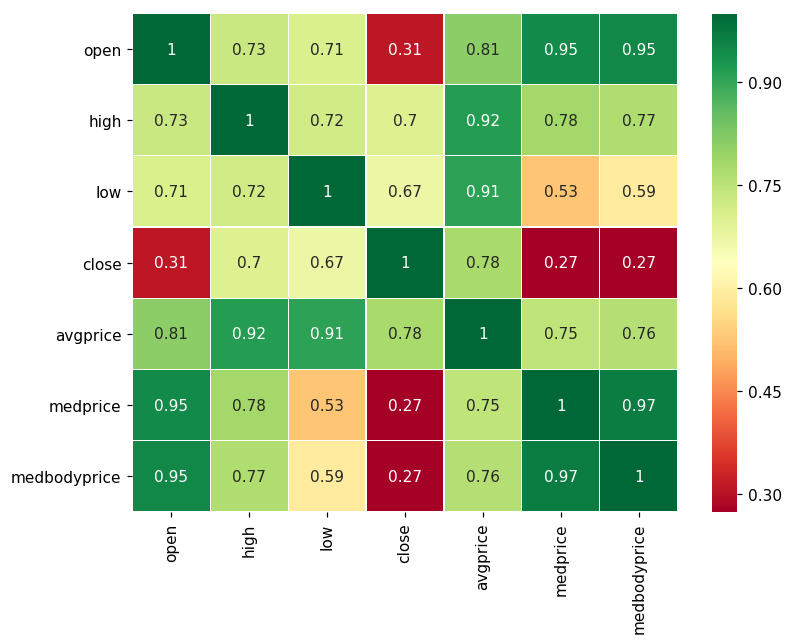

In [25]:
plt.figure(figsize=(8,6),dpi=110)
sns.heatmap(dataset_perc.iloc[:,:-2].corr(), cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=True);

## Abbiamo avuto informazioni sulle distribuzioni: andiamo ora alla ricerca di un effetto memoria!

Non ha senso lavorare con i valori nominali di OHLCA

### Effetto Memoria Chiusura Percentuale

In [26]:
memory_close = dataset_perc.copy()

numero_correlazioni = 10

for i in range(1, numero_correlazioni + 1):
    nome_colonna = "close_" + str(i)
    memory_close[nome_colonna] = memory_close.close.shift(i)

memory_close.drop(["open","high","low","avgprice","medprice","medbodyprice","body","range"], 
                  axis = 1, inplace = True)
memory_close.dropna(inplace = True)
memory_close.head(10)

,close,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10
Date,,,,,,,,,,,
2007-01-19,-0.628931,-6.194690,-2.235040,2.588757,-1.241782,-1.226551,4.841150,8.271908,0.493827,-0.735294,2.255639
2007-01-22,-1.898734,-0.628931,-6.194690,-2.235040,2.588757,-1.241782,-1.226551,4.841150,8.271908,0.493827,-0.735294
2007-01-23,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040,2.588757,-1.241782,-1.226551,4.841150,8.271908,0.493827
2007-01-24,1.225490,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040,2.588757,-1.241782,-1.226551,4.841150,8.271908
2007-01-25,-0.564972,1.225490,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040,2.588757,-1.241782,-1.226551,4.841150
2007-01-26,-0.974026,-0.564972,1.225490,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040,2.588757,-1.241782,-1.226551
2007-01-29,0.655738,-0.974026,-0.564972,1.225490,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040,2.588757,-1.241782
2007-01-30,-0.488599,0.655738,-0.974026,-0.564972,1.225490,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040,2.588757
2007-01-31,0.245499,-0.488599,0.655738,-0.974026,-0.564972,1.225490,-1.290323,-1.898734,-0.628931,-6.194690,-2.235040


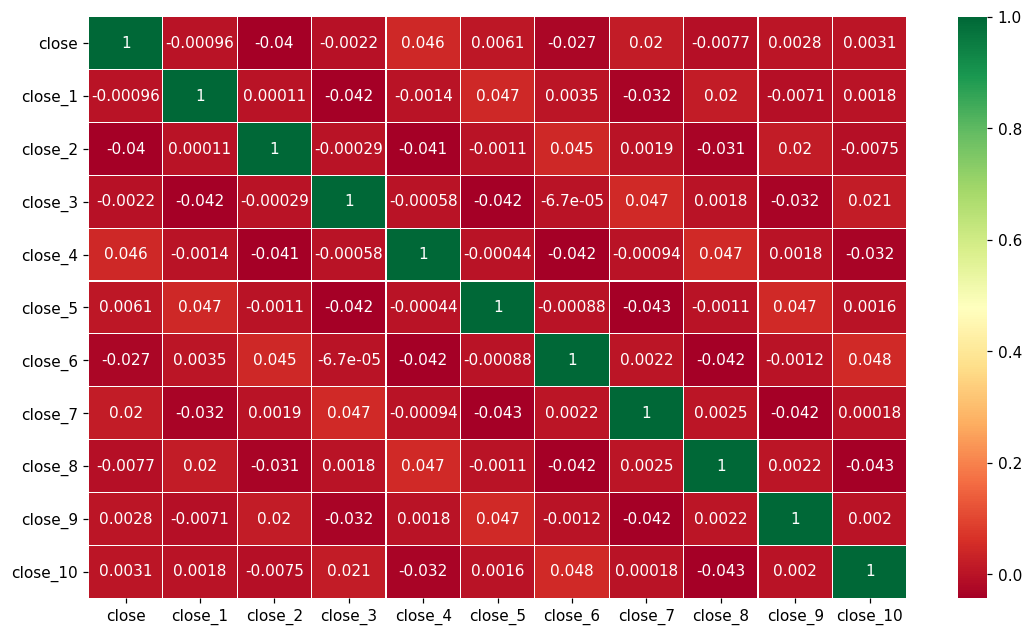

In [27]:
plt.figure(figsize=(12,7),dpi=110)
sns.heatmap(memory_close.corr(), cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=True);

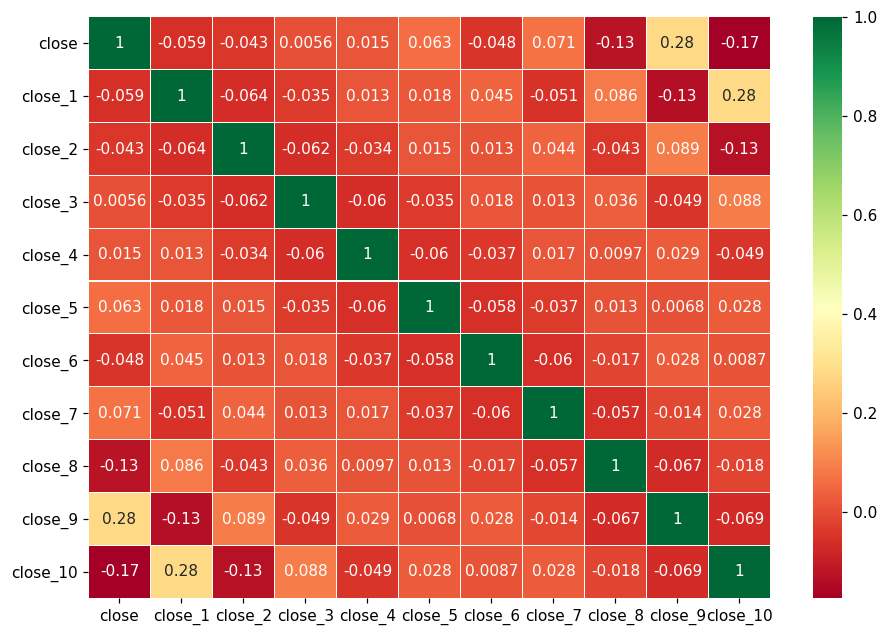

In [28]:
plt.figure(figsize=(10,7),dpi=110)
sns.heatmap(memory_close[-100:].corr(), cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=True);

Non esiste un effetto memoria apprezzabile sulle variazioni percentuali delle chiusure, ma concentriamoci sulla relazione inversa tra il campione attuale e quelli immediatamente successivi.

#### Acquisto dopo una barra negativa

In [29]:
memory_close = dataset_perc.copy()

threshold_low = 0
threshold_high = 0

memory_close["control"] = np.where((memory_close.close.shift(1) <= threshold_low) &
                                   (memory_close.close >= threshold_high),1,0)
memory_close.head(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range,control
Date,,,,,,,,,,
2007-01-04,-2.595296,-0.727567,2.307692,2.255639,0.268762,-3.947888,-3.077538,-163.888889,-53.731343,0
2007-01-05,1.998335,0.244300,0.751880,-0.735294,0.556701,1.726264,1.443299,-143.478261,-19.354839,0
2007-01-08,0.244898,0.406174,0.995025,0.493827,0.533115,-0.040404,0.121951,-30.000000,-28.000000,1
2007-01-09,0.570033,7.443366,-0.164204,8.271908,4.038344,4.365400,3.816484,-1342.857143,522.222222,0
2007-01-10,9.635628,5.195783,9.786184,4.841150,7.273084,7.281177,7.156824,-63.218391,-44.642857,0
2007-01-11,1.255539,-1.002147,1.797753,-1.226551,0.182749,-0.144404,0.145985,-106.250000,-61.290323,0
2007-01-12,-1.458789,-1.807664,-1.986755,-1.241782,-1.623495,-1.373825,-1.494169,-150.000000,8.333333,0
2007-01-16,1.184308,2.282769,2.402402,2.588757,2.113851,1.136364,1.886792,1900.000000,-3.846154,1
2007-01-17,1.975128,0.359971,-0.659824,-2.235040,-0.145270,2.464661,2.614379,-290.000000,56.000000,0


In [30]:
total = memory_close[(memory_close.close <= threshold_low)].close.count()
verified = memory_close.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

810  occorrenze su  1519  equivalenti al  53.32 %


#### Acquisto dopo due barre negative

In [31]:
memory_close = dataset_perc.copy()

threshold_low = 0
threshold_high = 0

memory_close["control"] = np.where((memory_close.close.shift(1) <= threshold_low) &
                                   (memory_close.close.shift(2) <= threshold_low) &
                                   (memory_close.close >= threshold_high),1,0)
memory_close.head(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range,control
Date,,,,,,,,,,
2007-01-04,-2.595296,-0.727567,2.307692,2.255639,0.268762,-3.947888,-3.077538,-163.888889,-53.731343,0
2007-01-05,1.998335,0.244300,0.751880,-0.735294,0.556701,1.726264,1.443299,-143.478261,-19.354839,0
2007-01-08,0.244898,0.406174,0.995025,0.493827,0.533115,-0.040404,0.121951,-30.000000,-28.000000,0
2007-01-09,0.570033,7.443366,-0.164204,8.271908,4.038344,4.365400,3.816484,-1342.857143,522.222222,0
2007-01-10,9.635628,5.195783,9.786184,4.841150,7.273084,7.281177,7.156824,-63.218391,-44.642857,0
2007-01-11,1.255539,-1.002147,1.797753,-1.226551,0.182749,-0.144404,0.145985,-106.250000,-61.290323,0
2007-01-12,-1.458789,-1.807664,-1.986755,-1.241782,-1.623495,-1.373825,-1.494169,-150.000000,8.333333,0
2007-01-16,1.184308,2.282769,2.402402,2.588757,2.113851,1.136364,1.886792,1900.000000,-3.846154,1
2007-01-17,1.975128,0.359971,-0.659824,-2.235040,-0.145270,2.464661,2.614379,-290.000000,56.000000,0


In [32]:
total = memory_close[(memory_close.close <= threshold_low) & 
                     (memory_close.close.shift(1) <= threshold_low)].close.count()
verified = memory_close.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

404  occorrenze su  719  equivalenti al  56.19 %


#### Acquisto dopo tre barre negative

In [33]:
memory_close = dataset_perc.copy()

threshold_low = 0
threshold_high = 0

memory_close["control"] = np.where((memory_close.close.shift(1) <= threshold_low) &
                                   (memory_close.close.shift(2) <= threshold_low) &
                                   (memory_close.close.shift(3) <= threshold_low) &
                                   (memory_close.close >= threshold_high),1,0)
memory_close.head(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range,control
Date,,,,,,,,,,
2007-01-04,-2.595296,-0.727567,2.307692,2.255639,0.268762,-3.947888,-3.077538,-163.888889,-53.731343,0
2007-01-05,1.998335,0.244300,0.751880,-0.735294,0.556701,1.726264,1.443299,-143.478261,-19.354839,0
2007-01-08,0.244898,0.406174,0.995025,0.493827,0.533115,-0.040404,0.121951,-30.000000,-28.000000,0
2007-01-09,0.570033,7.443366,-0.164204,8.271908,4.038344,4.365400,3.816484,-1342.857143,522.222222,0
2007-01-10,9.635628,5.195783,9.786184,4.841150,7.273084,7.281177,7.156824,-63.218391,-44.642857,0
2007-01-11,1.255539,-1.002147,1.797753,-1.226551,0.182749,-0.144404,0.145985,-106.250000,-61.290323,0
2007-01-12,-1.458789,-1.807664,-1.986755,-1.241782,-1.623495,-1.373825,-1.494169,-150.000000,8.333333,0
2007-01-16,1.184308,2.282769,2.402402,2.588757,2.113851,1.136364,1.886792,1900.000000,-3.846154,0
2007-01-17,1.975128,0.359971,-0.659824,-2.235040,-0.145270,2.464661,2.614379,-290.000000,56.000000,0


In [34]:
total = memory_close[(memory_close.close <= threshold_low) & 
                     (memory_close.close.shift(1) <= threshold_low) &
                     (memory_close.close.shift(2) <= threshold_low)].close.count()
verified = memory_close.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

190  occorrenze su  316  equivalenti al  60.13 %


### Effetto Memoria Avgprice

In [35]:
memory_avg = dataset_perc.copy()

numero_correlazioni = 10

for i in range(1, numero_correlazioni + 1):
    nome_colonna = "avgprice_" + str(i)
    memory_avg[nome_colonna] = memory_avg.avgprice.shift(i)

memory_avg.drop(["open","high","low","close","medprice","medbodyprice","body","range"], 
                axis = 1, inplace = True)
memory_avg.dropna(inplace = True)
memory_avg.head(10)

,avgprice,avgprice_1,avgprice_2,avgprice_3,avgprice_4,avgprice_5,avgprice_6,avgprice_7,avgprice_8,avgprice_9,avgprice_10
Date,,,,,,,,,,,
2007-01-19,-2.047913,-5.873795,-0.145270,2.113851,-1.623495,0.182749,7.273084,4.038344,0.533115,0.556701,0.268762
2007-01-22,-1.163708,-2.047913,-5.873795,-0.145270,2.113851,-1.623495,0.182749,7.273084,4.038344,0.533115,0.556701
2007-01-23,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270,2.113851,-1.623495,0.182749,7.273084,4.038344,0.533115
2007-01-24,0.629953,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270,2.113851,-1.623495,0.182749,7.273084,4.038344
2007-01-25,0.343296,0.629953,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270,2.113851,-1.623495,0.182749,7.273084
2007-01-26,-0.865365,0.343296,0.629953,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270,2.113851,-1.623495,0.182749
2007-01-29,-0.101502,-0.865365,0.343296,0.629953,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270,2.113851,-1.623495
2007-01-30,-0.203211,-0.101502,-0.865365,0.343296,0.629953,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270,2.113851
2007-01-31,-0.814498,-0.203211,-0.101502,-0.865365,0.343296,0.629953,-1.796049,-1.163708,-2.047913,-5.873795,-0.145270


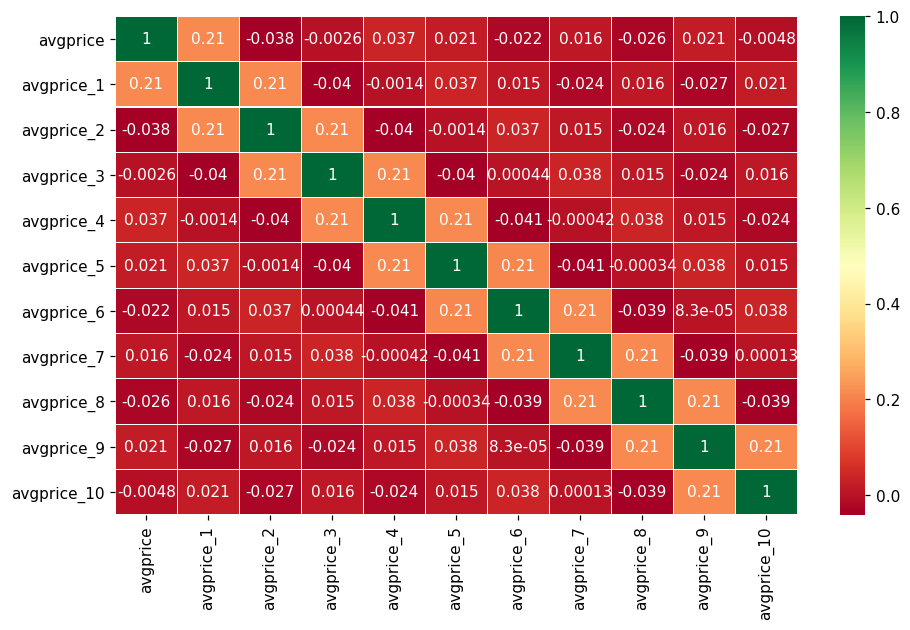

In [36]:
plt.figure(figsize=(10,6),dpi=110)
sns.heatmap(memory_avg.corr(), cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=True);

In [37]:
memory_avg = dataset_perc.copy()

threshold_low = 0
threshold_high = 0

memory_avg["control"] = np.where((memory_avg.avgprice.shift(1) >= threshold_low) &
                                 (memory_avg.avgprice >= threshold_high),1,0)
memory_avg.head(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range,control
Date,,,,,,,,,,
2007-01-04,-2.595296,-0.727567,2.307692,2.255639,0.268762,-3.947888,-3.077538,-163.888889,-53.731343,0
2007-01-05,1.998335,0.244300,0.751880,-0.735294,0.556701,1.726264,1.443299,-143.478261,-19.354839,1
2007-01-08,0.244898,0.406174,0.995025,0.493827,0.533115,-0.040404,0.121951,-30.000000,-28.000000,1
2007-01-09,0.570033,7.443366,-0.164204,8.271908,4.038344,4.365400,3.816484,-1342.857143,522.222222,1
2007-01-10,9.635628,5.195783,9.786184,4.841150,7.273084,7.281177,7.156824,-63.218391,-44.642857,1
2007-01-11,1.255539,-1.002147,1.797753,-1.226551,0.182749,-0.144404,0.145985,-106.250000,-61.290323,1
2007-01-12,-1.458789,-1.807664,-1.986755,-1.241782,-1.623495,-1.373825,-1.494169,-150.000000,8.333333,0
2007-01-16,1.184308,2.282769,2.402402,2.588757,2.113851,1.136364,1.886792,1900.000000,-3.846154,0
2007-01-17,1.975128,0.359971,-0.659824,-2.235040,-0.145270,2.464661,2.614379,-290.000000,56.000000,0


In [38]:
total = memory_avg[(memory_avg.avgprice >= threshold_low)].avgprice.count()
verified = memory_avg.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

1155  occorrenze su  1788  equivalenti al  64.6 %


In questo caso esiste una correlazione debole tra gli avgprice. Ma si tratta di una dipendenza non sfruttabile operativamente parlando, a meno che la close non si trovi sotto il precedente avgprice!

In [39]:
memory_avg = dataset_perc.copy().iloc[:,:-2]
memory_avg.columns = ["dopen","dhigh","dlow","dclose","dap","dmp","dmbp"]
memory_avg["open"] = dataset.open
memory_avg["high"] = dataset.high
memory_avg["low"] = dataset.low
memory_avg["close"] = dataset.close
memory_avg["avgprice"] = dataset.avgprice
memory_avg.head(10)

threshold_low = 1
threshold_high = 0

memory_avg["control"] = np.where((memory_avg.dap.shift(1) >= threshold_low) &
                                 (memory_avg.close.shift(1) <= memory_avg.avgprice.shift(1)) &
                                 (memory_avg.dap >= threshold_high),1,0)
memory_avg.head(10)

,dopen,dhigh,dlow,dclose,dap,dmp,dmbp,open,high,low,close,avgprice,control
Date,,,,,,,,,,,,,
2007-01-04,-2.595296,-0.727567,2.307692,2.255639,0.268762,-3.947888,-3.077538,12.01,12.28,11.97,12.24,12.1250,0
2007-01-05,1.998335,0.244300,0.751880,-0.735294,0.556701,1.726264,1.443299,12.25,12.31,12.06,12.15,12.1925,0
2007-01-08,0.244898,0.406174,0.995025,0.493827,0.533115,-0.040404,0.121951,12.28,12.36,12.18,12.21,12.2575,0
2007-01-09,0.570033,7.443366,-0.164204,8.271908,4.038344,4.365400,3.816484,12.35,13.28,12.16,13.22,12.7525,0
2007-01-10,9.635628,5.195783,9.786184,4.841150,7.273084,7.281177,7.156824,13.54,13.97,13.35,13.86,13.6800,0
2007-01-11,1.255539,-1.002147,1.797753,-1.226551,0.182749,-0.144404,0.145985,13.71,13.83,13.59,13.69,13.7050,0
2007-01-12,-1.458789,-1.807664,-1.986755,-1.241782,-1.623495,-1.373825,-1.494169,13.51,13.58,13.32,13.52,13.4825,0
2007-01-16,1.184308,2.282769,2.402402,2.588757,2.113851,1.136364,1.886792,13.67,13.89,13.64,13.87,13.7675,0
2007-01-17,1.975128,0.359971,-0.659824,-2.235040,-0.145270,2.464661,2.614379,13.94,13.94,13.55,13.56,13.7475,0


In [40]:
total = memory_avg[(memory_avg.dap.shift(1) >= threshold_low) &
                   (memory_avg.close.shift(1) <= memory_avg.avgprice.shift(1))].dap.count()
verified = memory_avg.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

70  occorrenze su  168  equivalenti al  41.67 %


### Effetto Memoria High

In [41]:
memory_high = dataset_perc.copy()

numero_correlazioni = 10

for i in range(1,numero_correlazioni + 1):
    nome_colonna = "high_" + str(i)
    memory_high[nome_colonna] = memory_high.high.shift(i)

memory_high.drop(["open","low","close","avgprice","medprice","medbodyprice","body","range"], 
                 axis = 1, inplace = True)
memory_high.dropna(inplace = True)
memory_high.head(10)

,high,high_1,high_2,high_3,high_4,high_5,high_6,high_7,high_8,high_9,high_10
Date,,,,,,,,,,,
2007-01-19,-2.659574,-5.595409,0.359971,2.282769,-1.807664,-1.002147,5.195783,7.443366,0.406174,0.244300,-0.727567
2007-01-22,-0.546448,-2.659574,-5.595409,0.359971,2.282769,-1.807664,-1.002147,5.195783,7.443366,0.406174,0.244300
2007-01-23,-1.883830,-0.546448,-2.659574,-5.595409,0.359971,2.282769,-1.807664,-1.002147,5.195783,7.443366,0.406174
2007-01-24,-0.400000,-1.883830,-0.546448,-2.659574,-5.595409,0.359971,2.282769,-1.807664,-1.002147,5.195783,7.443366
2007-01-25,1.526104,-0.400000,-1.883830,-0.546448,-2.659574,-5.595409,0.359971,2.282769,-1.807664,-1.002147,5.195783
2007-01-26,-1.265823,1.526104,-0.400000,-1.883830,-0.546448,-2.659574,-5.595409,0.359971,2.282769,-1.807664,-1.002147
2007-01-29,-0.801282,-1.265823,1.526104,-0.400000,-1.883830,-0.546448,-2.659574,-5.595409,0.359971,2.282769,-1.807664
2007-01-30,-0.161551,-0.801282,-1.265823,1.526104,-0.400000,-1.883830,-0.546448,-2.659574,-5.595409,0.359971,2.282769
2007-01-31,-0.566343,-0.161551,-0.801282,-1.265823,1.526104,-0.400000,-1.883830,-0.546448,-2.659574,-5.595409,0.359971


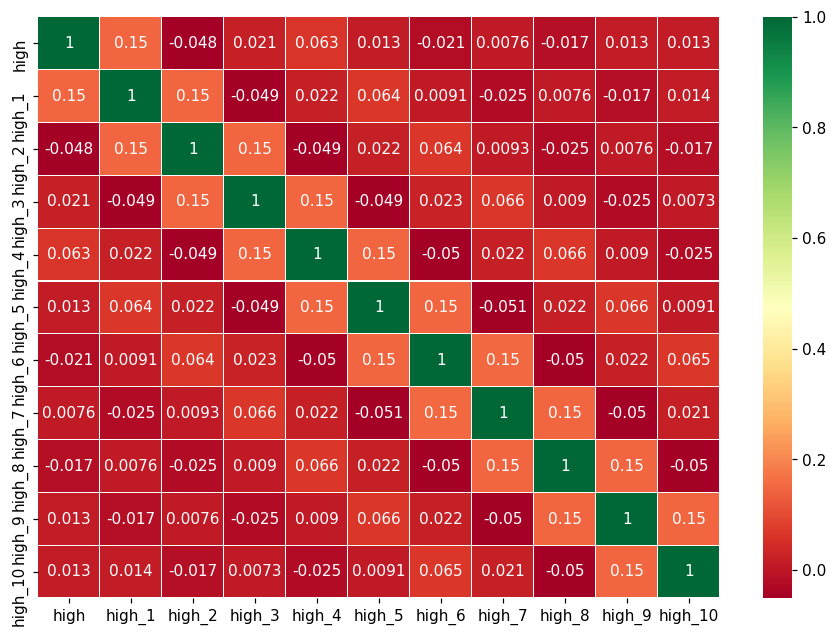

In [42]:
plt.figure(figsize=(10,7),dpi=110)
sns.heatmap(memory_high.corr(), cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=True);

In [43]:
memory_high = dataset_perc.copy()

threshold_low = 0
threshold_high = 0

memory_high["control"] = np.where((memory_high.high.shift(1) >= threshold_low) &\
                                  (memory_high.high >= threshold_high),1,0)
memory_high.head(10)

,open,high,low,close,avgprice,medprice,medbodyprice,body,range,control
Date,,,,,,,,,,
2007-01-04,-2.595296,-0.727567,2.307692,2.255639,0.268762,-3.947888,-3.077538,-163.888889,-53.731343,0
2007-01-05,1.998335,0.244300,0.751880,-0.735294,0.556701,1.726264,1.443299,-143.478261,-19.354839,0
2007-01-08,0.244898,0.406174,0.995025,0.493827,0.533115,-0.040404,0.121951,-30.000000,-28.000000,1
2007-01-09,0.570033,7.443366,-0.164204,8.271908,4.038344,4.365400,3.816484,-1342.857143,522.222222,1
2007-01-10,9.635628,5.195783,9.786184,4.841150,7.273084,7.281177,7.156824,-63.218391,-44.642857,1
2007-01-11,1.255539,-1.002147,1.797753,-1.226551,0.182749,-0.144404,0.145985,-106.250000,-61.290323,0
2007-01-12,-1.458789,-1.807664,-1.986755,-1.241782,-1.623495,-1.373825,-1.494169,-150.000000,8.333333,0
2007-01-16,1.184308,2.282769,2.402402,2.588757,2.113851,1.136364,1.886792,1900.000000,-3.846154,0
2007-01-17,1.975128,0.359971,-0.659824,-2.235040,-0.145270,2.464661,2.614379,-290.000000,56.000000,1


In [44]:
total = memory_high[(memory_high.high.shift(1) >= threshold_low)].high.count()
verified = memory_high.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

1000  occorrenze su  1696  equivalenti al  58.96 %


Misuriamo il numero di occorrenze operativamente sfruttabili entrando in apertura dell'ultima barra:

In [45]:
memory_high = dataset_perc.copy().iloc[:,:-2]
memory_high.columns = ["dopen","dhigh","dlow","dclose","dap","dmp","dmbp"]
memory_high["open"] = dataset.open
memory_high["high"] = dataset.high
memory_high["low"] = dataset.low
memory_high["close"] = dataset.close
memory_high["avgprice"] = dataset.avgprice
memory_high.head(10)

threshold_low = 1
threshold_high = 0

memory_high["control"] = np.where((memory_high.dhigh.shift(1) >= threshold_low) &
                                  (memory_high.open <= memory_high.high.shift(1)) &
                                  (memory_high.dhigh >= threshold_high),1,0)
memory_high[-90:-85]

,dopen,dhigh,dlow,dclose,dap,dmp,dmbp,open,high,low,close,avgprice,control
Date,,,,,,,,,,,,,
2019-05-15,-0.075103,1.080654,0.329001,1.197922,0.637180,0.307603,0.565228,186.27,191.75,186.02,190.92,188.7400,0
2019-05-16,1.954153,0.375489,1.515966,-0.439975,0.839780,1.369392,0.742331,189.91,192.47,188.84,190.08,190.3250,1
2019-05-17,-1.569164,-0.815712,-1.101462,-0.568182,-1.012741,-1.421307,-1.068449,186.93,190.90,186.76,189.00,188.3975,0
2019-05-20,-1.824212,-3.431116,-3.469694,-3.126984,-2.965804,-1.822751,-2.250419,183.52,184.35,180.28,183.09,182.8100,0
2019-05-21,0.926330,1.979929,2.451742,1.917090,1.816093,0.708685,1.183770,185.22,188.00,184.70,186.60,186.1300,0


In [46]:
total = memory_high[(memory_high.dhigh.shift(1) >= threshold_low) &
                    (memory_high.open <= memory_high.high.shift(1))].high.count()
verified = memory_high.control.sum()
perc = verified / total * 100
print(verified," occorrenze su ", total, " equivalenti al ", round(perc,2), "%")

260  occorrenze su  504  equivalenti al  51.59 %


Creiamo un trading system grezzo su tale regola

In [47]:
memory_high = dataset_perc.copy().iloc[:,:-2]
memory_high.columns = ["dopen","dhigh","dlow","dclose","dap","dmp","dmbp"]
memory_high["open"] = dataset.open
memory_high["high"] = dataset.high
memory_high["low"] = dataset.low
memory_high["close"] = dataset.close
memory_high["ap"] = dataset.avgprice
memory_high.drop(["dopen","dlow","dclose","dap","dmp","dmbp"], axis = 1, inplace = True)
memory_high.head(10)

threshold_low = 1
money = 10000

memory_high["stocks"] = (money / memory_high.close.shift(1)).apply(lambda x: round(x,0))
memory_high["position"] = np.where((memory_high.dhigh.shift(1) > threshold_low) &
                                   (memory_high.open <= memory_high.high.shift(1)) &
                                   (memory_high.high >= memory_high.high.shift(1)),1,0)
memory_high["entry"] = np.where(memory_high.open <= memory_high.high.shift(1),
                                memory_high.high.shift(1),memory_high.open)
memory_high["exit"] = dataset.open.shift(-1)
memory_high["trade"] = (memory_high.exit - memory_high.entry) * memory_high.stocks
memory_high["gain"] = (memory_high.position * memory_high.trade)
memory_high["equity"] = memory_high.gain.cumsum()
memory_high["gain"] = np.where(memory_high["gain"] != 0, memory_high["gain"], np.nan)
memory_high = memory_high[1:]
memory_high[-90:-85]

,dhigh,open,high,low,close,ap,stocks,position,entry,exit,trade,gain,equity
Date,,,,,,,,,,,,,
2019-05-15,1.080654,186.27,191.75,186.02,190.92,188.7400,53.0,0,189.70,189.91,11.13,NaN,1785.91
2019-05-16,0.375489,189.91,192.47,188.84,190.08,190.3250,52.0,1,191.75,186.93,-250.64,-250.64,1535.27
2019-05-17,-0.815712,186.93,190.90,186.76,189.00,188.3975,53.0,0,192.47,183.52,-474.35,NaN,1535.27
2019-05-20,-3.431116,183.52,184.35,180.28,183.09,182.8100,53.0,0,190.90,185.22,-301.04,NaN,1535.27
2019-05-21,1.979929,185.22,188.00,184.70,186.60,186.1300,55.0,0,185.22,184.66,-30.80,NaN,1535.27


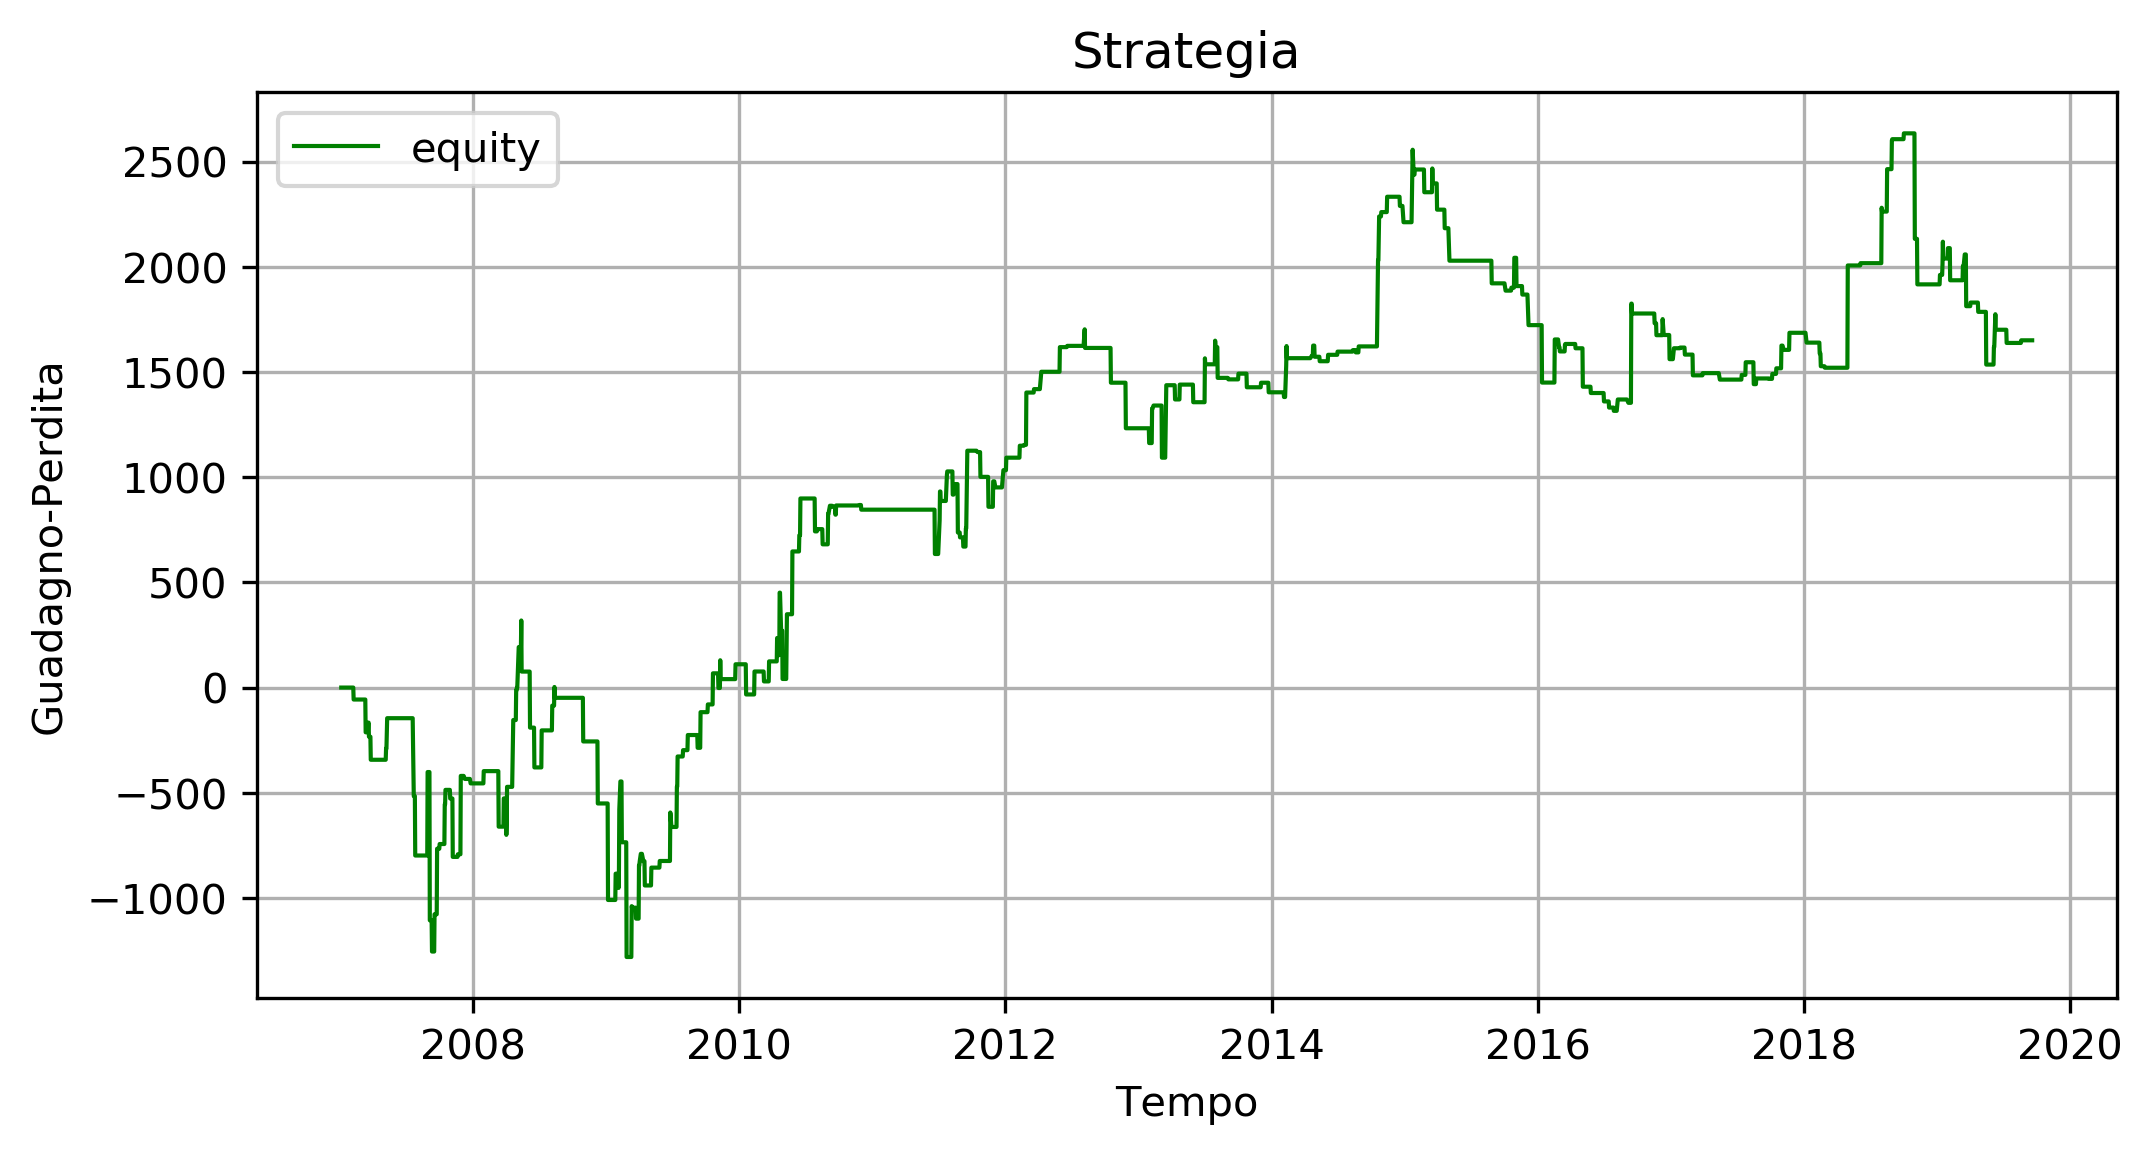

In [48]:
plt.figure(figsize=(8,4), dpi=300)
plt.plot(memory_high.equity, color='green', linewidth=1.0)
plt.xlabel("Tempo")
plt.ylabel("Guadagno-Perdita")
plt.title("Strategia")
plt.grid(True)
plt.legend()
plt.show()